In [42]:
import numpy as np
import pandas as pd
import os
import joblib
from elephant.gpfa import GPFA
import quantities as pq
import neo
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from kneed import KneeLocator
import scipy

# DO NOT CHANGE THIS
delay_fromstart2_1stTTL = [4.3055] # 3rd LED pulse starts from 4.3055-4.4073 (first TTL signal train)
# delay_fromstart2_1stLED = [x]




ks_dir = 'Z:/KH282_BL6/ephys/061721/2021-06-17_14-31-22/Record Node 101/experiment2/recording1/continuous/Neuropix-PXI-100.0'
behav_dir = 'Z:/Helen_neuro_behavior/0617'    
    
class load_kilsort:

    def __init__(self, path):
        self.path = path

    def load_spike_times(self):
        return np.load(str.join('', (self.path, '/spike_times.npy')))

    def load_spike_clusters(self):
        return np.load(str.join('', (self.path, '/spike_clusters.npy')))

    def load_cluster_labels(self):
        return pd.read_csv(str.join('', (self.path, '/cluster_group.tsv')), sep="\t")

    def load_cluster_info(self):
        return pd.read_csv(str.join('', (self.path, '/cluster_info.tsv')), sep="\t")

    def load_channel_map(self):
        return np.load(str.join('', (self.path, '/channel_map.npy')))

    def load_templates(self):
        return np.load(str.join('', (self.path, '/templates.npy')))
    
    
class kilosort2_spike_trains:

    def __init__(self):
        self.path = ks_dir
        spike_loader = load_kilsort(self.path)
        self.spike_times = spike_loader.load_spike_times()
        self.clusters = spike_loader.load_spike_clusters()
        self.cluster_labels = spike_loader.load_cluster_labels()
        self.channel_map = spike_loader.load_channel_map()
        self.cluster_info = spike_loader.load_cluster_info()
        self.templates = spike_loader.load_templates()
        self.good_clusters = []
        try:
            with open(os.path.join(self.path, '_removed_neuron.sav'), 'rb') as fr:
                removed_neurons = joblib.load(fr)
                self.removed_neurons = removed_neurons[0]
        except FileNotFoundError:
            self.removed_neurons = []

    def find_neurons(self):
        mua = 'No'
        if mua == 'Yes':
            for i, neuron in enumerate(np.unique(self.cluster_labels['cluster_id'])):
                if self.cluster_labels['group'][i] == 'good' or self.cluster_labels['group'][i] == 'mua' \
                        and neuron not in self.removed_neurons:
                    self.good_clusters.append(neuron)
        elif mua == 'No':
            for i, neuron in enumerate(np.unique(self.cluster_labels['cluster_id'])):
                if self.cluster_labels['group'][i] == 'good':
                    self.good_clusters.append(neuron)

    def show_templates(self):
        fig, axs = plt.subplots(len(self.good_clusters) // 5 + 1, 5, figsize=(16, 12))
        axs = axs.ravel()
        for i, neuron in enumerate(self.good_clusters):
            axs[i].plot(self.templates[neuron][:, np.where(
                self.channel_map[:][0] == self.cluster_info['ch'][np.where(self.cluster_info['id'] == neuron)[
                                              0][0]])[0][0]], c='black', label=neuron)
            axs[i].text(1, 0, '{}'.format(self.cluster_info['fr'][np.where(self.cluster_info['id'] == neuron)[
                                              0][0]]), horizontalalignment='center',
                        verticalalignment='center', transform=axs[i].transAxes)
#             axs[i].legend()
        plt.show()

    def main(self):
        self.find_neurons()
        self.show_templates()
        return self.spike_times, self.clusters, self.good_clusters


class load_behavior:
    
    def __init__(self):
        self.path = behav_dir
        self.csv_list = []
        self.name_list = []
        
    def load(self):
        for names in os.listdir(self.path):
            if names.endswith(".csv"):
                df = pd.read_csv(os.path.join(behav_dir, names))
                self.csv_list.append(df)
                self.name_list.append(names.partition('_')[2])
        
    def main(self):
        self.load()
        return self.csv_list, self.name_list
    



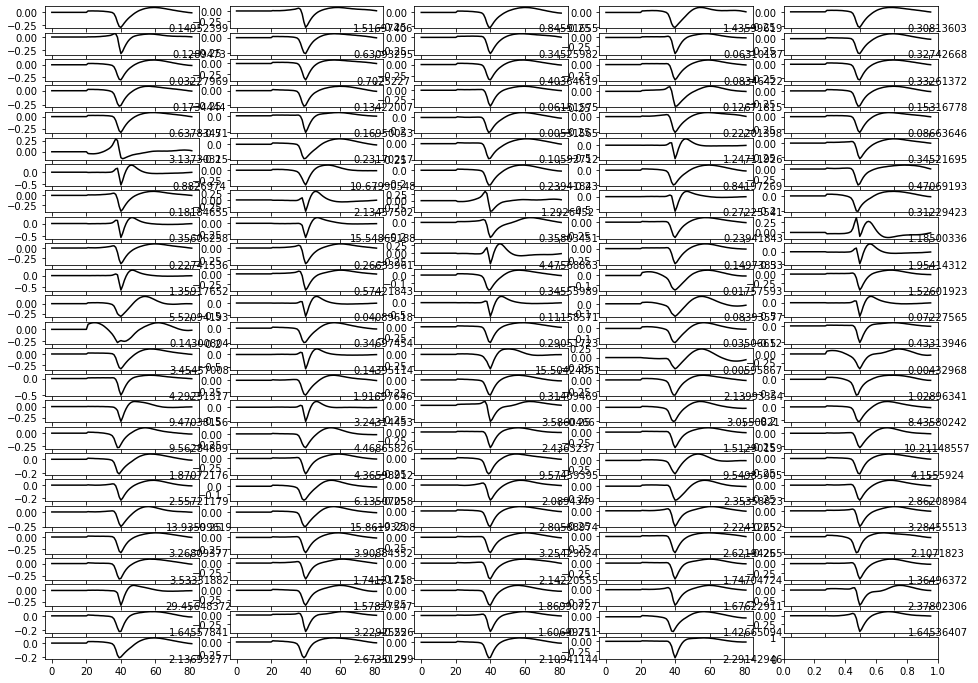

In [2]:
# load kilosort spike-sorted units and show templates for good clusters (number written on each panel is average firing rate)
spike_trains_loader = kilosort2_spike_trains()
spike_times, clusters, good_clusters = spike_trains_loader.main()

In [3]:
# go through the list of good clusters neuron
for i, neuron in enumerate(good_clusters):
    print(i, neuron)

0 7
1 8
2 9
3 12
4 13
5 14
6 15
7 18
8 19
9 20
10 21
11 23
12 24
13 26
14 27
15 28
16 29
17 30
18 32
19 33
20 36
21 37
22 39
23 40
24 41
25 46
26 48
27 52
28 55
29 58
30 66
31 68
32 70
33 71
34 72
35 74
36 76
37 78
38 79
39 82
40 87
41 88
42 89
43 91
44 92
45 93
46 94
47 105
48 107
49 108
50 109
51 112
52 115
53 117
54 119
55 121
56 130
57 133
58 135
59 139
60 142
61 144
62 155
63 157
64 161
65 168
66 181
67 184
68 207
69 215
70 236
71 237
72 239
73 242
74 244
75 247
76 251
77 254
78 255
79 258
80 260
81 265
82 267
83 268
84 269
85 270
86 273
87 275
88 277
89 280
90 281
91 282
92 284
93 285
94 287
95 290
96 291
97 292
98 293
99 295
100 296
101 299
102 300
103 301
104 302
105 305
106 309
107 310
108 312
109 313
110 314
111 317
112 319
113 324
114 326
115 330
116 332
117 335
118 338
119 342
120 343
121 348
122 350
123 352


In [4]:
# print the array size for spike times and its corresponding neuron number
print(spike_times.shape, clusters.shape)

(22064506, 1) (22064506, 1)


In [ ]:
clusters[:50]

In [ ]:
spike_times[:50]/30000 # divide by sampling rate (30k) gives the actual time.

In [5]:
# load up the csv files (list) in the behavior directory 
behav_loader = load_behavior()
behavior_list, name_list = behav_loader.main()
print(len(behavior_list)) # print number of loaded csv files
print(name_list)

16
['groom - start_time_1.csv', 'groom - start_time_2.csv', 'groom - start_time_3.csv', 'groom - start_time_4.csv', 'itch - start_time_1.csv', 'itch - start_time_2.csv', 'itch - start_time_3.csv', 'itch - start_time_4.csv', 'locomotion - start_time_1.csv', 'locomotion - start_time_2.csv', 'locomotion - start_time_3.csv', 'locomotion - start_time_4.csv', 'rear - start_time_1.csv', 'rear - start_time_2.csv', 'rear - start_time_3.csv', 'rear - start_time_4.csv']


In [ ]:
for names in name_list:
    if 'groom' in names:
        print(names.partition(' ')[0])

In [ ]:
for i, name in enumerate(name_list):
    print(i, name)

In [6]:
# delay = delay_fromstart2_1stTTL - delay_fromstart2_1stLED
delay = 4.8445

# don't change this
framerate = 60
time_window = [-0.5, 1]
sample_rate = 30000
# 1st segment camera 4, third LED peak
cam4_start_seg1 = 37880
# video start times for 4 segments, camera 4
video_Starttime = [37880, 46176, 53390, 57719]
# frames to third LED peak for 4 segments, camera 4
frames2LED_sincestart = [300, 332, 434, 399]
# example behavior -- grooming type a
# first_beh_since_LED = 205.4


# neural_LED_sincestart = video_Starttime + frames2LED_sincestart/framerate - delay

# first_beh_since_neural_recording = neural_LED_sincestart + first_beh_since_LED




In [141]:
# for all PSTHs
time_window_width = 1.5 #seconds
bin_width = 0.05 #50 ms
bin_count = 30
bin_times = (np.arange(bin_count)) * time_window_width / bin_count - time_window_width / 3

In [7]:
# prints out individual groom type start times
allseg_psthlist = []
psth_list = []
count = 0
for n, name in enumerate(name_list):
    allgroom_psthlist = []
    if 'groom' in name:
        
        print(count)
        neural_LED_sincestart = video_Starttime[count] - cam4_start_seg1 + \
                                frames2LED_sincestart[count]/framerate - delay
        count += 1
        types = ['a', 'h', 's', 'b']
        
        print(neural_LED_sincestart)
        for ty in types:
            find_t = behavior_list[n]['type'] == ty
            for i in range(len(np.where(find_t == True)[0])):
                print('groom type ', ty, ' : ', behavior_list[n]['start_time'][np.where(find_t == True)[0][i]])
#                 neural_LED_sincestart = video_Starttime + frames2LED_sincestart/framerate - delay
                first_beh_since_neural_recording = neural_LED_sincestart + behavior_list[n]['start_time'][np.where(find_t == True)[0][i]]
                min_bound = np.where(spike_times/sample_rate >= first_beh_since_neural_recording + time_window[0])[0]
                max_bound = np.where(spike_times/sample_rate <= first_beh_since_neural_recording + time_window[1])[0]
        #         print(first_beh_since_neural_recording)
                d = {'spike_times': np.concatenate(
                    spike_times[min_bound[0]:max_bound[-1]])/30000 - spike_times[min_bound[0]]/30000
                     , 'neuron_id': np.concatenate(clusters[min_bound[0]:max_bound[-1]]), 'behavior': ty}
#                 print(d)
                df = pd.DataFrame(data=d)
                psth_list.append(df)
#             allgroom_psthlist.append(psth_list)
#         allseg_psthlist.append(allgroom_psthlist)
        
        

0
0.15549999999999997
groom type  a  :  523.3833333
groom type  a  :  526.0
groom type  a  :  532.7666667
groom type  a  :  540.3666667
groom type  a  :  580.65
groom type  a  :  683.4333333
groom type  a  :  702.5333333
groom type  a  :  756.3666667
groom type  a  :  770.85
groom type  a  :  793.9833333
groom type  a  :  866.6666667
groom type  a  :  933.1666667
groom type  a  :  941.35
groom type  a  :  1071.616667
groom type  a  :  1439.016667
groom type  a  :  1461.133333
groom type  a  :  1470.583333
groom type  a  :  1620.616667
groom type  h  :  517.1
groom type  h  :  723.7833333
groom type  h  :  790.7666667
groom type  h  :  792.6
groom type  h  :  929.4666667
groom type  h  :  955.3666667
groom type  h  :  1070.866667
groom type  h  :  1076.166667
groom type  h  :  1419.733333
groom type  h  :  1445.716667
groom type  h  :  1469.483333
groom type  s  :  524.3
groom type  s  :  529.4666667
groom type  s  :  722.9833333
groom type  s  :  954.4333333
groom type  s  :  1073.1833

In [ ]:
#min_bound = np.where(spike_times/sample_rate > first_beh_since_neural_recording + time_window[0])[0]
#max_bound = np.where(spike_times/sample_rate < first_beh_since_neural_recording + time_window[1])[0]

In [163]:
psth_list

[      spike_times  neuron_id behavior
 0        0.000000        278        a
 1        0.001500        204        a
 2        0.001567        282        a
 3        0.001733        253        a
 4        0.002333        315        a
 ...           ...        ...      ...
 1559     1.492167        260        a
 1560     1.492433         18        a
 1561     1.492433        347        a
 1562     1.494900        264        a
 1563     1.495600        171        a
 
 [1564 rows x 3 columns],
       spike_times  neuron_id behavior
 0        0.000000        350        a
 1        0.001400        277        a
 2        0.001700        291        a
 3        0.002467        280        a
 4        0.003267        274        a
 ...           ...        ...      ...
 1358     1.486067        245        a
 1359     1.490833        274        a
 1360     1.493333        289        a
 1361     1.493367        314        a
 1362     1.493633        280        a
 
 [1363 rows x 3 columns],
       s

In [ ]:
psth_list[2].iloc[13]

In [142]:
# make PSTHs for each separate groom type and for all groom types together to compare
# 36 'a', 21 'h', 25 's', 23 'b'
# PSTHs for average firing rate in spikes per second and PSTHs for individual bouts in order to calculate and/or plot deviance?

psth_groom = pd.DataFrame()
#psth_groom_indv = pd.DataFrame()

for df in psth_list:
    
    for neuron_id in df['neuron_id'].unique():
        
        if neuron_id in good_clusters:
            neuron_spike_times = df[df['neuron_id']==neuron_id]['spike_times']
            #print(neuron_spike_times)
            psth_groom[neuron_id] = [0]*bin_count
            counts,_ = np.histogram(neuron_spike_times, bins = np.arange(0, 1.501, bin_width))
            #print(counts)
            #psth_groom_indv = [0]*bin_count
            #counts2 = np.divide(counts, bin_width)
            #print(counts2)
            #counts2s = pd.Series(counts2)
            #counts2_list = counts2.tolist()
            #print(counts2_list)
            psth_groom[neuron_id] += counts/(len(psth_list))/bin_width
            #psth_groom_indv[neuron_id].append(counts2s)
            
            


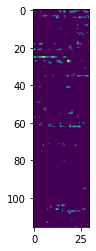

In [145]:
plt.imshow(psth_groom.T, vmin = 0.2, vmax = 1)

In [63]:
psth_groom_a = pd.DataFrame()
psth_groom_h = pd.DataFrame()
psth_groom_s = pd.DataFrame()
psth_groom_b = pd.DataFrame()

for df in psth_list:
    df_a = df[df['behavior'] == 'a']
    for neuron_id in df_a['neuron_id'].unique():
        if neuron_id in good_clusters:
            neuron_spike_times = df_a[df_a['neuron_id']==neuron_id]['spike_times']
            print(neuron_spike_times)
            psth_groom_a[neuron_id] = [0]*bin_count
            counts,_ = np.histogram(neuron_spike_times, bins = np.arange(0, 1.501, bin_width))
            psth_groom_a[neuron_id] += counts/(len(psth_list))/bin_width
        
    df_h = df[df['behavior'] == 'h']
    for neuron_id in df_h['neuron_id'].unique():
        if neuron_id in good_clusters:
            neuron_spike_times = df_h[df_h['neuron_id']==neuron_id]['spike_times']
            print(neuron_spike_times)
            psth_groom_h[neuron_id] = [0]*bin_count
            counts,_ = np.histogram(neuron_spike_times, bins = np.arange(0, 1.501, bin_width))
            psth_groom_h[neuron_id] += counts/(len(psth_list))/bin_width  
    
    df_s = df[df['behavior'] == 's']
    for neuron_id in df_s['neuron_id'].unique():
        if neuron_id in good_clusters:
            neuron_spike_times = df_s[df_s['neuron_id']==neuron_id]['spike_times']
            print(neuron_spike_times)
            psth_groom_s[neuron_id] = [0]*bin_count
            counts,_ = np.histogram(neuron_spike_times, bins = np.arange(0, 1.501, bin_width))
            psth_groom_s[neuron_id] += counts/(len(psth_list))/bin_width    
            
    df_b = df[df['behavior'] == 'b']
    for neuron_id in df_b['neuron_id'].unique():
        if neuron_id in good_clusters:
            neuron_spike_times = df_b[df_b['neuron_id']==neuron_id]['spike_times']
            print(neuron_spike_times)
            psth_groom_b[neuron_id] = [0]*bin_count
            counts,_ = np.histogram(neuron_spike_times, bins = np.arange(0, 1.501, bin_width))
            psth_groom_b[neuron_id] += counts/(len(psth_list))/bin_width
            

2       0.001567
54      0.035200
95      0.081433
175     0.184500
408     0.406933
532     0.525100
562     0.540000
624     0.600100
675     0.645767
717     0.679533
724     0.685267
759     0.705567
787     0.728000
861     0.801667
958     0.906500
1044    0.996067
1121    1.059767
Name: spike_times, dtype: float64
8       0.003733
46      0.024867
127     0.123800
193     0.206733
374     0.382700
406     0.405900
427     0.425133
487     0.492333
575     0.559467
793     0.731933
802     0.743667
836     0.782067
855     0.799833
885     0.819467
909     0.838600
939     0.878933
949     0.898400
972     0.922833
1014    0.969667
1032    0.985633
1070    1.011467
1094    1.033667
1113    1.049900
1179    1.119967
1198    1.138933
1215    1.158500
1225    1.166667
1351    1.288033
1542    1.471667
Name: spike_times, dtype: float64
9      0.004200
181    0.194400
677    0.646633
698    0.665767
781    0.719300
982    0.938500
Name: spike_times, dtype: float64
11      0.004400
21 

Name: spike_times, dtype: float64
20      0.021033
292     0.250467
430     0.374267
467     0.417667
746     0.730167
938     0.961533
1000    1.035767
1023    1.065200
1156    1.224300
1210    1.303600
1299    1.406633
1302    1.408367
Name: spike_times, dtype: float64
22      0.024700
33      0.030533
40      0.036500
58      0.045533
84      0.066633
140     0.126500
153     0.137300
171     0.150900
276     0.235467
337     0.283100
370     0.315100
433     0.376600
511     0.473067
577     0.535267
608     0.566300
623     0.590000
679     0.665367
778     0.768733
816     0.806633
888     0.899300
931     0.956833
962     0.985900
972     0.999167
1074    1.134567
1142    1.201700
1160    1.234200
1186    1.262800
1205    1.295400
1233    1.336667
1282    1.389667
1306    1.414033
1315    1.428200
1337    1.454200
1355    1.482267
Name: spike_times, dtype: float64
28      0.028733
90      0.071933
103     0.088133
116     0.100833
151     0.134933
183     0.162667
193     0.1708

Name: spike_times, dtype: float64
96      0.104167
462     0.457633
669     0.660200
835     0.808733
1131    1.084667
1562    1.451067
1608    1.492033
Name: spike_times, dtype: float64
101     0.107100
230     0.226700
264     0.261500
280     0.276533
476     0.473100
1403    1.332267
1424    1.344267
1493    1.396167
Name: spike_times, dtype: float64
107    0.115833
180    0.170733
323    0.313533
333    0.318633
590    0.577733
Name: spike_times, dtype: float64
114     0.120100
583     0.566800
675     0.669400
715     0.708000
752     0.743067
794     0.775300
1146    1.102333
Name: spike_times, dtype: float64
128     0.137500
222     0.218300
327     0.315067
465     0.463533
606     0.591000
648     0.637833
818     0.794833
848     0.821233
950     0.923033
993     0.962533
1084    1.037200
1144    1.100433
1238    1.176567
1257    1.193233
1273    1.205967
1294    1.230667
1428    1.346167
1509    1.406767
1525    1.420267
1547    1.437700
1558    1.446867
1596    1.481900
Na

657     0.476300
751     0.535300
934     0.653900
1034    0.706733
1147    0.771233
1275    0.843633
Name: spike_times, dtype: float64
728    0.522367
744    0.532000
Name: spike_times, dtype: float64
853    0.601100
978    0.680633
Name: spike_times, dtype: float64
902     0.633300
923     0.645467
941     0.657600
986     0.685000
996     0.691200
1069    0.727033
Name: spike_times, dtype: float64
942    0.658467
Name: spike_times, dtype: float64
1003    0.693167
Name: spike_times, dtype: float64
1129    0.761633
Name: spike_times, dtype: float64
1315    0.885300
1579    1.077533
1667    1.146033
1802    1.235667
Name: spike_times, dtype: float64
1372    0.9311
Name: spike_times, dtype: float64
1690    1.162233
Name: spike_times, dtype: float64
1773    1.210933
Name: spike_times, dtype: float64
1963    1.357733
1994    1.382400
2036    1.415400
Name: spike_times, dtype: float64
2077    1.449533
Name: spike_times, dtype: float64
0       0.000000
1239    0.796767
1270    0.821867
1313

Name: spike_times, Length: 63, dtype: float64
25      0.035300
105     0.105200
165     0.153900
182     0.166633
207     0.196000
228     0.226167
276     0.265200
300     0.291833
321     0.324400
330     0.336367
497     0.489467
522     0.509167
563     0.549100
586     0.571333
605     0.582700
614     0.595033
627     0.606867
636     0.613233
643     0.621433
657     0.634600
660     0.638767
666     0.644133
670     0.650700
681     0.657933
686     0.665467
698     0.680200
705     0.686133
763     0.750033
884     0.856800
1042    1.024033
1095    1.071433
1134    1.102433
1171    1.132133
1197    1.159100
1215    1.173700
1227    1.182700
1231    1.188433
1242    1.199433
1246    1.205000
1252    1.211633
1260    1.218700
1266    1.227167
1294    1.252200
1303    1.263167
1310    1.273967
1317    1.284033
1324    1.295400
1336    1.308000
1347    1.321500
Name: spike_times, dtype: float64
30      0.040833
53      0.053767
84      0.080500
93      0.089000
225     0.224600
35

Name: spike_times, dtype: float64
61    0.0651
Name: spike_times, dtype: float64
81     0.086700
164    0.174567
215    0.226900
313    0.331400
351    0.374400
379    0.412167
493    0.547533
652    0.729967
730    0.814500
768    0.837800
858    0.928100
891    0.966800
986    1.045933
Name: spike_times, dtype: float64
83      0.088400
663     0.735833
910     0.977700
1049    1.121500
1149    1.219467
1340    1.412500
Name: spike_times, dtype: float64
90      0.0973
717     0.7976
729     0.8142
1366    1.4415
Name: spike_times, dtype: float64
92      0.098167
189     0.201367
1172    1.237700
1216    1.285900
1300    1.368600
1413    1.498067
Name: spike_times, dtype: float64
94      0.098633
113     0.120433
126     0.136133
129     0.143433
198     0.204467
344     0.367500
382     0.414267
452     0.494267
571     0.638833
586     0.655700
601     0.673700
623     0.697967
676     0.754867
697     0.778967
792     0.858933
850     0.916533
907     0.975933
938     1.002167
944  

Name: spike_times, dtype: float64
140     0.146133
1205    1.173300
1447    1.413733
Name: spike_times, dtype: float64
148     0.158000
174     0.188100
212     0.220767
243     0.257467
293     0.305667
537     0.514633
575     0.555033
754     0.751033
963     0.940100
988     0.966000
1020    0.995867
1048    1.025800
1108    1.072633
1507    1.484067
Name: spike_times, dtype: float64
183    0.196067
344    0.343533
Name: spike_times, dtype: float64
208    0.214433
882    0.860167
Name: spike_times, dtype: float64
214     0.222300
301     0.313933
357     0.350600
424     0.405500
794     0.792533
966     0.944667
1073    1.044533
Name: spike_times, dtype: float64
227    0.239233
255    0.266167
Name: spike_times, dtype: float64
238    0.250567
333    0.332733
Name: spike_times, dtype: float64
250    0.262333
Name: spike_times, dtype: float64
306    0.318867
348    0.345233
Name: spike_times, dtype: float64
349     0.345400
377     0.366667
887     0.862400
992     0.969833
1032    

1136    1.425633
Name: spike_times, dtype: float64
3       0.009600
34      0.036633
51      0.058933
70      0.077667
137     0.152167
168     0.183433
187     0.207800
261     0.295767
269     0.305067
365     0.375167
444     0.436900
459     0.454433
531     0.530233
553     0.555167
732     0.749067
807     0.847833
847     0.876833
918     0.943700
952     0.960233
982     0.977933
1148    1.104867
1176    1.132967
1192    1.148533
1504    1.439333
Name: spike_times, dtype: float64
6      0.011467
20     0.025933
123    0.142167
162    0.177833
259    0.291733
Name: spike_times, dtype: float64
8       0.011867
338     0.355167
598     0.614433
647     0.667200
1331    1.267733
Name: spike_times, dtype: float64
9       0.014400
525     0.523500
655     0.673733
1103    1.050100
1189    1.147700
Name: spike_times, dtype: float64
13      0.018033
1030    1.008600
Name: spike_times, dtype: float64
15      0.020467
32      0.033800
48      0.056467
61      0.070767
85      0.091467
10

1544    1.4972
Name: spike_times, dtype: float64
6       0.001967
1394    1.077600
1781    1.375533
Name: spike_times, dtype: float64
23      0.013267
32      0.017367
98      0.048800
162     0.073933
197     0.091367
206     0.094867
274     0.144400
325     0.178667
381     0.222433
415     0.242033
429     0.255233
447     0.269767
492     0.317400
507     0.324267
561     0.347467
576     0.357200
599     0.380933
618     0.401400
647     0.436733
699     0.495600
765     0.546667
810     0.584867
828     0.608867
846     0.634600
870     0.653567
954     0.718033
983     0.741333
991     0.745700
1016    0.758600
1024    0.763367
1047    0.775667
1079    0.807633
1106    0.829900
1116    0.835033
1236    0.933067
1327    1.012867
1342    1.028467
1350    1.037400
1352    1.039700
1466    1.129200
1521    1.174667
1594    1.236067
1649    1.274500
1677    1.293333
1695    1.311067
1720    1.324533
1983    1.495367
Name: spike_times, dtype: float64
24      0.013300
114     0.057867

3      0.003933
133    0.108133
350    0.286167
362    0.289967
395    0.312833
416    0.324967
449    0.347733
458    0.356233
564    0.455600
751    0.631133
789    0.660267
Name: spike_times, dtype: float64
4       0.004200
16      0.014633
37      0.034200
49      0.040933
59      0.049333
71      0.058133
77      0.062800
83      0.067233
98      0.081033
104     0.089200
117     0.099133
144     0.117133
165     0.133967
200     0.153400
231     0.176233
331     0.271467
360     0.289667
374     0.299967
386     0.307567
419     0.325600
448     0.347033
473     0.368133
560     0.454000
643     0.539333
767     0.639933
780     0.651800
794     0.662833
819     0.683933
845     0.702100
888     0.728900
929     0.765833
1044    0.859700
1131    0.929733
1261    1.016900
1362    1.094867
1406    1.130033
1439    1.156167
1477    1.188900
1503    1.218600
1541    1.247767
1574    1.276000
1649    1.337933
1698    1.378500
1726    1.393200
1738    1.402400
1760    1.414700
1789    

Name: spike_times, dtype: float64
529     0.427400
1255    1.013800
1436    1.152800
1586    1.291967
1642    1.332000
Name: spike_times, dtype: float64
602     0.491533
802     0.672300
1498    1.214733
Name: spike_times, dtype: float64
641    0.537967
769    0.640467
Name: spike_times, dtype: float64
674     0.572633
833     0.695033
1030    0.847500
1504    1.218900
Name: spike_times, dtype: float64
731     0.614900
770     0.640867
1364    1.095567
1408    1.131067
1547    1.251867
1696    1.377833
Name: spike_times, dtype: float64
757     0.632967
844     0.701400
1046    0.860200
1083    0.899000
1111    0.916100
1197    0.979433
1221    0.995333
1398    1.119767
1868    1.475533
Name: spike_times, dtype: float64
823    0.686200
851    0.707033
Name: spike_times, dtype: float64
826     0.688233
884     0.726533
945     0.778567
970     0.796833
979     0.799200
1004    0.819700
1035    0.854000
1061    0.875333
1105    0.912767
1136    0.931233
1192    0.976700
1376    1.104100
1

Name: spike_times, dtype: float64
1246    1.216033
Name: spike_times, dtype: float64
1395    1.365833
Name: spike_times, dtype: float64
1413    1.383833
Name: spike_times, dtype: float64
1498    1.4882
Name: spike_times, dtype: float64
1       0.001900
4       0.010133
63      0.060300
86      0.094300
102     0.115800
117     0.131667
159     0.199633
171     0.216533
173     0.224333
179     0.234900
233     0.317367
240     0.330700
260     0.353133
286     0.388167
297     0.401500
317     0.411833
322     0.419333
338     0.437367
755     0.615233
764     0.619267
806     0.641367
840     0.659967
851     0.665633
1088    0.809367
1217    0.909033
1254    0.945167
1289    0.988633
1309    1.002633
1370    1.052767
1375    1.056500
1410    1.074467
1465    1.100033
1501    1.146533
1511    1.154533
1527    1.168733
1571    1.195467
1594    1.214533
1606    1.223267
1640    1.245900
1651    1.252400
1666    1.259300
1706    1.284400
1722    1.290533
1941    1.433933
1971    1.454800

Name: spike_times, dtype: float64
792     0.634667
924     0.707000
1521    1.161967
Name: spike_times, dtype: float64
904     0.693833
1228    0.918600
1279    0.975600
1630    1.240133
1846    1.360433
1994    1.473300
Name: spike_times, dtype: float64
939    0.7128
Name: spike_times, dtype: float64
1097    0.815433
1276    0.967867
1494    1.139433
1549    1.180600
1862    1.374600
1953    1.443933
Name: spike_times, dtype: float64
1114    0.832233
1247    0.938800
1298    0.994900
Name: spike_times, dtype: float64
1129    0.843167
Name: spike_times, dtype: float64
1199    0.8988
Name: spike_times, dtype: float64
1257    0.949433
1850    1.364767
1925    1.422300
Name: spike_times, dtype: float64
1292    0.991267
Name: spike_times, dtype: float64
1299    0.995
Name: spike_times, dtype: float64
1331    1.030167
1357    1.045100
1369    1.052667
1385    1.063100
1405    1.071800
1510    1.154000
1824    1.347133
1874    1.383867
1905    1.403433
Name: spike_times, dtype: float64
1348 

Name: spike_times, dtype: float64
258    0.203700
544    0.454733
603    0.504833
733    0.619333
931    0.785333
Name: spike_times, dtype: float64
282    0.220533
588    0.489867
Name: spike_times, dtype: float64
283     0.220767
937     0.787567
962     0.815500
1089    0.928400
1358    1.145133
Name: spike_times, dtype: float64
294    0.229233
Name: spike_times, dtype: float64
303     0.245900
830     0.701100
960     0.814100
1210    1.014467
1409    1.206767
1476    1.280067
1499    1.294167
1621    1.405000
1666    1.450633
1711    1.489200
Name: spike_times, dtype: float64
329     0.283767
649     0.548000
731     0.618833
770     0.653067
906     0.767833
979     0.832367
1078    0.920367
1108    0.938233
1131    0.954500
1187    0.996333
1199    1.006500
1209    1.014267
1224    1.027567
1437    1.241500
1610    1.394033
1663    1.449300
Name: spike_times, dtype: float64
399    0.3407
Name: spike_times, dtype: float64
450    0.374567
Name: spike_times, dtype: float64
454    0.

Name: spike_times, dtype: float64
550    0.562200
809    0.926300
839    0.994667
Name: spike_times, dtype: float64
566    0.578800
577    0.587100
603    0.607167
682    0.709433
Name: spike_times, dtype: float64
579    0.592700
614    0.621867
Name: spike_times, dtype: float64
585    0.598433
Name: spike_times, dtype: float64
601    0.606333
Name: spike_times, dtype: float64
653    0.660400
668    0.680133
Name: spike_times, dtype: float64
703    0.745367
Name: spike_times, dtype: float64
709     0.750667
748     0.831367
788     0.888600
811     0.929133
877     1.047167
969     1.203067
1043    1.333933
Name: spike_times, dtype: float64
734    0.8025
Name: spike_times, dtype: float64
751    0.842333
763    0.864633
Name: spike_times, dtype: float64
895    1.072067
Name: spike_times, dtype: float64
915    1.105833
948    1.164833
Name: spike_times, dtype: float64
972    1.206833
Name: spike_times, dtype: float64
1062    1.362433
Name: spike_times, dtype: float64
2       0.001867
55 

Name: spike_times, dtype: float64
11      0.007200
23      0.024400
50      0.059667
149     0.154233
180     0.185867
279     0.282733
352     0.375033
395     0.414533
415     0.435467
458     0.482300
669     0.774633
762     0.908733
806     0.991800
864     1.063633
919     1.140633
941     1.164133
945     1.171933
1061    1.316000
1136    1.378200
1174    1.405567
1183    1.415500
1188    1.424133
1192    1.428433
Name: spike_times, dtype: float64
12      0.008400
372     0.389200
606     0.666300
909     1.124000
921     1.142567
958     1.188933
1000    1.255133
1102    1.351867
Name: spike_times, dtype: float64
17      0.017267
100     0.108333
161     0.166833
208     0.207900
350     0.373300
483     0.507733
742     0.874967
751     0.886767
810     0.996600
823     1.015967
872     1.077633
1241    1.478867
Name: spike_times, dtype: float64
19     0.020133
138    0.148267
155    0.158267
490    0.512367
585    0.623267
Name: spike_times, dtype: float64
20      0.020433
70

384     0.328833
623     0.543300
705     0.612000
749     0.649900
819     0.736633
833     0.754067
846     0.767700
1102    1.036633
1143    1.081167
1219    1.163300
1348    1.281167
Name: spike_times, dtype: float64
405     0.347400
454     0.384133
500     0.418333
648     0.566800
765     0.663500
798     0.709567
837     0.757533
865     0.792600
909     0.840233
928     0.859467
942     0.882600
945     0.891200
965     0.899833
968     0.905733
970     0.911633
980     0.919533
984     0.925033
992     0.931600
994     0.936167
1005    0.942133
1015    0.950967
1041    0.977200
1057    0.995300
1061    0.999533
1070    1.010900
1078    1.015733
1085    1.025600
1100    1.034900
1115    1.051133
1128    1.064367
1155    1.093600
1166    1.117867
1177    1.128033
1182    1.133300
1202    1.144533
1213    1.156867
1228    1.170933
1234    1.175433
1246    1.188400
1255    1.196433
1260    1.201700
1278    1.217867
1294    1.230500
1304    1.236700
1310    1.243533
1323    1.2517

Name: spike_times, dtype: float64
631    0.472967
865    0.788667
Name: spike_times, dtype: float64
690     0.539833
705     0.556967
966     0.870000
1357    1.343467
Name: spike_times, dtype: float64
700     0.550367
720     0.575267
723     0.582067
789     0.664667
1017    0.924967
1148    1.107333
1178    1.150767
1215    1.196733
1261    1.224933
1270    1.236467
1286    1.257600
1359    1.343900
1378    1.370067
1398    1.398400
1523    1.454533
1549    1.470300
Name: spike_times, dtype: float64
707     0.560267
721     0.578033
981     0.886967
1044    0.959233
Name: spike_times, dtype: float64
809     0.703367
1062    0.981333
1170    1.141100
1297    1.281333
1363    1.347733
Name: spike_times, dtype: float64
813     0.7071
1163    1.1287
1338    1.3251
Name: spike_times, dtype: float64
848     0.758533
869     0.793033
1294    1.268400
1327    1.309367
Name: spike_times, dtype: float64
995    0.901867
Name: spike_times, dtype: float64
1019    0.933167
Name: spike_times, dtyp

8       0.003700
668     0.641433
1268    1.360367
Name: spike_times, dtype: float64
10      0.004700
112     0.084700
181     0.149733
216     0.183667
224     0.189567
250     0.224233
631     0.602600
673     0.646867
684     0.654933
700     0.679033
701     0.684100
708     0.688433
717     0.697533
725     0.702467
764     0.754567
777     0.776700
785     0.785100
791     0.788600
843     0.851433
923     0.980667
926     0.983833
931     0.988933
998     1.073533
1017    1.104167
1026    1.114333
1036    1.125867
1085    1.170533
1153    1.245800
1168    1.255067
1170    1.259667
1188    1.281100
1228    1.330067
1307    1.404267
1324    1.417600
1340    1.440267
1353    1.454567
1377    1.475267
1399    1.493933
Name: spike_times, dtype: float64
12      0.004767
53      0.038567
260     0.234733
347     0.325733
451     0.422400
516     0.478267
538     0.497400
551     0.514300
572     0.546133
606     0.579800
648     0.614633
714     0.696267
1351    1.450933
1398    1.4932

886     0.907500
995     1.066633
1020    1.109400
1033    1.120500
1104    1.181267
Name: spike_times, dtype: float64
922    0.980133
Name: spike_times, dtype: float64
937    1.0075
Name: spike_times, dtype: float64
939     1.008233
1229    1.330533
Name: spike_times, dtype: float64
1003    1.078567
Name: spike_times, dtype: float64
1031    1.117967
Name: spike_times, dtype: float64
0       0.000000
11      0.008967
15      0.013867
47      0.041167
73      0.060267
78      0.067433
97      0.100933
114     0.120900
124     0.131567
161     0.163800
181     0.185500
192     0.216967
249     0.282300
255     0.285833
350     0.361633
381     0.389700
418     0.453800
441     0.486567
461     0.499633
464     0.507667
467     0.511267
479     0.522100
526     0.580767
573     0.643867
686     0.762567
760     0.847467
817     0.907467
968     1.046467
1027    1.116767
1054    1.147933
1092    1.186400
1134    1.231633
1188    1.296700
1220    1.330500
1234    1.343067
1255    1.363900
1

Name: spike_times, dtype: float64
62      0.059067
98      0.091967
1281    0.834267
1291    0.843167
1319    0.863500
1456    0.944367
1490    0.976167
1722    1.102467
1842    1.171867
1867    1.194867
2023    1.312033
2103    1.368300
Name: spike_times, dtype: float64
66      0.062633
146     0.116800
153     0.120833
201     0.138433
232     0.158667
398     0.286833
439     0.313200
456     0.327600
469     0.339400
566     0.375400
632     0.401233
680     0.422233
695     0.428600
710     0.437667
801     0.500400
878     0.572767
889     0.582500
930     0.603300
1004    0.647633
1039    0.670067
1176    0.761933
1193    0.776700
1240    0.814600
1271    0.826967
1300    0.849333
1325    0.864500
1356    0.881567
1416    0.920533
1433    0.929833
1509    0.988167
1532    1.008133
1563    1.020033
1603    1.040300
1652    1.069533
1670    1.078733
1695    1.090667
1730    1.105333
1769    1.127900
1776    1.133800
1791    1.141833
2037    1.320733
2061    1.338700
2079    1.3496

Name: spike_times, dtype: float64
292     0.247067
1381    1.155133
Name: spike_times, dtype: float64
316     0.267700
520     0.400867
890     0.587733
906     0.601267
1215    0.917033
1355    1.127300
Name: spike_times, dtype: float64
317     0.267700
653     0.460233
700     0.511333
929     0.630667
1053    0.712733
1629    1.280667
1697    1.306967
1801    1.353600
Name: spike_times, dtype: float64
321     0.271800
648     0.454967
1049    0.710367
1741    1.327300
Name: spike_times, dtype: float64
324     0.275433
1189    0.881333
1692    1.304967
Name: spike_times, dtype: float64
349     0.312167
885     0.584400
1556    1.251900
1670    1.296267
1837    1.368933
1919    1.412200
Name: spike_times, dtype: float64
351     0.313333
1448    1.216833
Name: spike_times, dtype: float64
357     0.319200
729     0.534933
1193    0.883900
1292    1.047567
1430    1.204733
Name: spike_times, dtype: float64
392    0.3268
Name: spike_times, dtype: float64
439     0.335967
1425    1.199767


Name: spike_times, dtype: float64
866    0.740433
Name: spike_times, dtype: float64
906    0.791267
Name: spike_times, dtype: float64
991     0.856033
1588    1.245533
1635    1.285100
1771    1.379967
1837    1.438433
1879    1.479900
Name: spike_times, dtype: float64
1047    0.894500
1147    0.950067
Name: spike_times, dtype: float64
1085    0.918100
1129    0.944967
1144    0.948733
Name: spike_times, dtype: float64
1133    0.945433
1325    1.061500
Name: spike_times, dtype: float64
1226    0.996400
1566    1.236767
Name: spike_times, dtype: float64
1400    1.113733
Name: spike_times, dtype: float64
1548    1.222167
1556    1.229667
1576    1.240233
1587    1.245333
1602    1.254667
1616    1.265967
1640    1.286733
1696    1.328467
1717    1.345500
1732    1.357633
1753    1.368500
1767    1.377667
Name: spike_times, dtype: float64
1557    1.229833
1584    1.243033
1590    1.246933
1603    1.255000
1614    1.261133
1710    1.341567
1737    1.359367
1761    1.374367
Name: spike_time

Name: spike_times, dtype: float64
20      0.029267
111     0.105767
1346    1.477700
Name: spike_times, dtype: float64
27      0.035933
89      0.089633
143     0.140600
362     0.370967
635     0.658533
1152    1.223167
1276    1.392100
Name: spike_times, dtype: float64
30    0.037333
80    0.082400
99    0.099000
Name: spike_times, dtype: float64
34      0.038733
132     0.123300
198     0.194400
215     0.218800
221     0.223567
235     0.243633
240     0.247267
251     0.261900
253     0.264467
262     0.273600
303     0.308267
310     0.319300
356     0.365933
359     0.369033
544     0.560233
577     0.602800
1060    1.096233
1087    1.131633
1129    1.203867
1169    1.253200
Name: spike_times, dtype: float64
42      0.047567
424     0.425033
523     0.532000
593     0.617133
760     0.796933
769     0.806700
787     0.827867
816     0.848333
829     0.861533
849     0.885033
866     0.897200
898     0.926800
941     0.961633
954     0.987933
1001    1.037933
1012    1.051300
104

Name: spike_times, dtype: float64
193    0.366967
342    0.520500
377    0.563967
623    0.837633
773    1.003667
Name: spike_times, dtype: float64
195     0.367567
1072    1.398433
Name: spike_times, dtype: float64
201     0.376800
760     0.983000
771     1.001333
1134    1.465333
Name: spike_times, dtype: float64
210     0.381067
304     0.483900
378     0.565033
423     0.621233
476     0.675133
540     0.747867
649     0.859867
665     0.876600
674     0.885333
682     0.896400
702     0.921100
717     0.933267
725     0.943567
742     0.964133
877     1.160700
911     1.218500
1030    1.359767
1067    1.392000
1081    1.408900
1093    1.424933
1123    1.453900
1154    1.484633
Name: spike_times, dtype: float64
211     0.384733
215     0.391367
227     0.404700
236     0.413267
251     0.424800
258     0.433100
261     0.439133
272     0.450833
279     0.458667
283     0.464400
289     0.468600
295     0.474933
319     0.493833
326     0.502567
341     0.516967
348     0.524933
35

Name: spike_times, dtype: float64
790     0.780367
1131    1.136767
1310    1.258500
1712    1.470300
Name: spike_times, dtype: float64
805    0.793967
983    0.999433
Name: spike_times, dtype: float64
809    0.7958
Name: spike_times, dtype: float64
918     0.9226
1069    1.0791
Name: spike_times, dtype: float64
931    0.944
Name: spike_times, dtype: float64
960    0.978367
Name: spike_times, dtype: float64
980     0.995533
1497    1.342633
Name: spike_times, dtype: float64
1122    1.124667
1285    1.219433
1498    1.344000
1688    1.442933
Name: spike_times, dtype: float64
1136    1.142100
1274    1.211733
1337    1.288933
Name: spike_times, dtype: float64
1179    1.186167
1696    1.447533
Name: spike_times, dtype: float64
1325    1.2752
1656    1.4252
Name: spike_times, dtype: float64
1379    1.301833
Name: spike_times, dtype: float64
1517    1.361
Name: spike_times, dtype: float64
1701    1.453133
Name: spike_times, dtype: float64
4       0.008700
34      0.042400
46      0.060000
7

Name: spike_times, dtype: float64
30      0.033700
69      0.066367
274     0.265133
351     0.337533
370     0.348033
481     0.434767
540     0.474533
892     0.707867
925     0.736633
996     0.782733
1019    0.797367
1163    0.876400
1201    0.899233
1230    0.923900
1277    0.964100
1287    0.967667
1294    0.975600
1336    1.003400
1405    1.055233
1476    1.133833
1663    1.280133
1681    1.299367
1703    1.324500
1707    1.328200
1725    1.352400
1735    1.365567
1774    1.409900
Name: spike_times, dtype: float64
35    0.038833
Name: spike_times, dtype: float64
50      0.051067
101     0.089367
148     0.137367
181     0.176500
268     0.258933
292     0.280100
312     0.300733
366     0.344667
395     0.368767
435     0.397600
472     0.426933
555     0.480367
709     0.593400
758     0.624567
785     0.641900
800     0.656867
813     0.664100
891     0.707800
987     0.776467
1373    1.032067
1699    1.315467
1801    1.445633
Name: spike_times, dtype: float64
51      0.051333

Name: spike_times, dtype: float64
244     0.131733
287     0.161267
329     0.184000
662     0.370467
740     0.412733
1372    0.831733
1444    0.859667
1754    1.058000
1885    1.128400
1910    1.145933
2208    1.329233
2296    1.371833
2325    1.392233
Name: spike_times, dtype: float64
247     0.133733
456     0.274000
587     0.337233
889     0.512600
924     0.547433
1355    0.825600
1395    0.842100
1567    0.916467
2138    1.303833
2218    1.334800
2372    1.424933
Name: spike_times, dtype: float64
293    0.163733
421    0.248933
845    0.478267
Name: spike_times, dtype: float64
309     0.170400
555     0.326000
641     0.361300
793     0.445033
878     0.506067
969     0.578000
1050    0.615700
1095    0.640133
1187    0.700867
1220    0.726000
1321    0.803800
1358    0.826267
1416    0.853200
1555    0.909067
1680    1.022300
1753    1.057800
1809    1.084867
1906    1.143067
1936    1.168267
1989    1.223400
2062    1.279167
2178    1.319867
2394    1.439100
Name: spike_times

Name: spike_times, dtype: float64
639    0.449433
Name: spike_times, dtype: float64
695    0.486867
Name: spike_times, dtype: float64
770     0.528267
2104    1.312567
Name: spike_times, dtype: float64
826     0.548567
871     0.577433
1202    0.764600
1295    0.828667
1993    1.251300
2237    1.408633
2303    1.445767
Name: spike_times, dtype: float64
970     0.641233
986     0.654967
1021    0.675800
1166    0.747067
1193    0.761167
1230    0.785067
1272    0.809967
1292    0.826867
1354    0.865467
1459    0.928233
1502    0.956300
1526    0.974233
1574    1.000500
1624    1.027300
1639    1.039233
1680    1.064833
1705    1.082500
1739    1.104833
1840    1.173233
1916    1.212167
1957    1.236633
2087    1.304533
2322    1.462033
Name: spike_times, dtype: float64
1051    0.6971
Name: spike_times, dtype: float64
1054    0.6977
Name: spike_times, dtype: float64
1093    0.714100
1596    1.012233
1742    1.107667
1848    1.175333
1953    1.235933
Name: spike_times, dtype: float64
114

Name: spike_times, dtype: float64
10     0.013400
86     0.105900
594    0.863133
681    0.995533
714    1.056900
Name: spike_times, dtype: float64
12     0.014633
84     0.105300
112    0.148867
221    0.272667
284    0.404800
430    0.612667
767    1.141333
841    1.263233
879    1.323633
929    1.363233
Name: spike_times, dtype: float64
15      0.018333
55      0.068633
144     0.173000
189     0.219100
233     0.301200
269     0.359200
307     0.441967
388     0.543633
442     0.649500
469     0.686067
524     0.767967
551     0.826900
561     0.836500
574     0.841033
621     0.913433
643     0.943233
665     0.971800
696     1.015300
715     1.057067
763     1.134667
985     1.424400
1035    1.463500
Name: spike_times, dtype: float64
27      0.037933
169     0.205633
556     0.829567
857     1.287667
1015    1.451533
Name: spike_times, dtype: float64
29      0.039633
286     0.409867
316     0.453867
438     0.642133
492     0.713400
513     0.745533
522     0.762367
528     0.77

Name: spike_times, dtype: float64
117     0.077400
513     0.319867
930     0.631267
943     0.640433
953     0.650000
987     0.666800
999     0.675533
1013    0.684433
1025    0.693833
1033    0.698567
1042    0.704100
1053    0.708400
1068    0.713633
1078    0.719933
1088    0.726067
1094    0.733033
1105    0.739567
1109    0.745333
1126    0.754633
1137    0.760700
1152    0.773267
1167    0.786433
1201    0.822133
1207    0.827433
1215    0.833600
1231    0.845900
1251    0.860367
1272    0.871800
1287    0.879567
1298    0.886867
1311    0.894200
1336    0.911467
1348    0.922567
1371    0.936033
1384    0.942267
1389    0.954400
1403    0.963833
1446    1.008633
1483    1.039367
1510    1.056300
1524    1.066333
1543    1.077433
1560    1.091733
1637    1.138967
1661    1.154600
1709    1.183033
Name: spike_times, dtype: float64
138     0.088833
1240    0.853933
1911    1.343333
Name: spike_times, dtype: float64
170     0.104233
1021    0.693033
1243    0.854900
1262    0.8670

Name: spike_times, dtype: float64
255     0.191167
365     0.290133
1161    0.967200
Name: spike_times, dtype: float64
281     0.218233
301     0.235800
317     0.246367
349     0.281967
754     0.613067
823     0.670000
836     0.681467
1272    1.077333
1433    1.160733
1495    1.228767
Name: spike_times, dtype: float64
290     0.226933
428     0.336700
688     0.578000
728     0.600133
892     0.747500
954     0.814667
1006    0.844967
1051    0.873133
1103    0.909067
1297    1.089533
1421    1.149267
1649    1.375833
1732    1.419100
Name: spike_times, dtype: float64
297     0.233467
544     0.420933
958     0.816033
1245    1.053667
Name: spike_times, dtype: float64
304     0.239167
578     0.467867
800     0.654267
1119    0.921333
1525    1.256167
Name: spike_times, dtype: float64
310     0.240433
323     0.251633
338     0.269267
343     0.276333
384     0.306800
415     0.325300
633     0.523800
657     0.555533
763     0.623833
938     0.800933
982     0.831200
1074    0.8901

Name: spike_times, dtype: float64
1048    1.1364
Name: spike_times, dtype: float64
1083    1.166300
1141    1.229267
Name: spike_times, dtype: float64
1085    1.1712
Name: spike_times, dtype: float64
1117    1.199933
1288    1.341833
1338    1.387467
Name: spike_times, dtype: float64
1187    1.264167
Name: spike_times, dtype: float64
1221    1.286133
Name: spike_times, dtype: float64
1290    1.343133
Name: spike_times, dtype: float64
1337    1.386733
Name: spike_times, dtype: float64
1348    1.3944
Name: spike_times, dtype: float64
0       0.000000
28      0.024100
71      0.056667
105     0.083900
226     0.171133
656     0.461200
715     0.506133
829     0.603633
886     0.647933
994     0.734533
1040    0.771900
1075    0.818633
1101    0.848733
1120    0.870500
1130    0.878567
1148    0.893667
1173    0.909533
1203    0.926900
1247    0.967467
1293    1.022233
1352    1.099100
1375    1.120300
1386    1.132433
1418    1.152633
1433    1.168867
1448    1.177067
1460    1.186067
148

Name: spike_times, dtype: float64
2    0.001733
Name: spike_times, dtype: float64
7       0.003500
1321    1.020433
1644    1.272133
Name: spike_times, dtype: float64
10      0.006433
22      0.011333
94      0.056233
252     0.176733
270     0.189033
542     0.363500
573     0.384000
584     0.391533
611     0.413667
649     0.452000
935     0.661633
950     0.683767
1011    0.739867
1155    0.858000
1240    0.936000
1270    0.973333
1316    1.012333
1835    1.487533
Name: spike_times, dtype: float64
12      0.007100
99      0.063767
198     0.132200
233     0.165067
244     0.173533
620     0.421433
704     0.495800
1046    0.771733
1400    1.070667
1517    1.167033
Name: spike_times, dtype: float64
15     0.008167
32     0.015467
50     0.026567
69     0.040733
107    0.070200
392    0.268267
425    0.282967
452    0.300967
530    0.353867
808    0.563267
Name: spike_times, dtype: float64
19      0.010300
40      0.020700
272     0.190233
413     0.279200
1427    1.089233
Name: spik

Name: spike_times, dtype: float64
106     0.086300
746     0.641433
1211    1.097100
1489    1.351200
Name: spike_times, dtype: float64
113     0.092700
413     0.333000
691     0.587800
1186    1.064200
1299    1.177133
Name: spike_times, dtype: float64
123     0.098467
214     0.178833
243     0.204767
429     0.345267
1466    1.323067
Name: spike_times, dtype: float64
124    0.099867
341    0.277467
418    0.334500
Name: spike_times, dtype: float64
146    0.124033
254    0.210267
314    0.252600
603    0.516133
Name: spike_times, dtype: float64
149     0.124833
441     0.352067
709     0.601767
744     0.639900
907     0.807667
916     0.819233
949     0.853833
961     0.865100
1000    0.905933
1031    0.931467
1131    1.014333
1155    1.035167
1177    1.056433
1205    1.086167
1216    1.099233
1447    1.303900
1471    1.330167
1505    1.365200
1588    1.448633
Name: spike_times, dtype: float64
186    0.155300
199    0.168767
209    0.176467
283    0.234067
358    0.283033
722    0.

Name: spike_times, dtype: float64
564     0.496633
1122    0.945500
1145    0.963233
1218    1.030367
1244    1.057700
Name: spike_times, dtype: float64
638    0.573667
Name: spike_times, dtype: float64
684     0.614967
852     0.733633
863     0.741200
1286    1.101733
1327    1.133567
1336    1.145233
Name: spike_times, dtype: float64
703    0.6393
Name: spike_times, dtype: float64
711    0.643033
721    0.647433
891    0.765800
898    0.769767
Name: spike_times, dtype: float64
745     0.658700
757     0.665367
782     0.679200
822     0.708167
901     0.773067
1220    1.032833
1279    1.092967
1288    1.103000
1305    1.117133
1320    1.126800
1330    1.140800
1353    1.164900
1399    1.197167
1534    1.314933
Name: spike_times, dtype: float64
751    0.661667
Name: spike_times, dtype: float64
797    0.692900
814    0.702833
936    0.807833
Name: spike_times, dtype: float64
862    0.741100
879    0.753933
Name: spike_times, dtype: float64
910    0.781933
Name: spike_times, dtype: flo

14      0.014667
63      0.060667
214     0.219167
259     0.272400
299     0.306833
309     0.325733
320     0.337667
342     0.362300
356     0.375633
382     0.398833
501     0.511400
530     0.543867
544     0.554333
568     0.575200
604     0.615300
727     0.732233
821     0.836767
838     0.852500
902     0.920700
952     0.969667
964     0.973633
972     0.984567
1019    1.016233
1043    1.043033
1084    1.097667
1158    1.164000
1176    1.177433
1199    1.193233
1245    1.242500
1316    1.315633
Name: spike_times, dtype: float64
20    0.021167
Name: spike_times, dtype: float64
23      0.027800
464     0.477933
559     0.568733
618     0.637967
1221    1.224133
1459    1.445800
1469    1.456900
1484    1.486000
Name: spike_times, dtype: float64
24      0.029467
155     0.156933
162     0.165733
174     0.177667
187     0.192033
201     0.209600
240     0.239467
251     0.267133
270     0.285667
284     0.300400
302     0.309167
318     0.335433
331     0.352100
354     0.374100

Name: spike_times, dtype: float64
221    0.281233
575    0.741867
Name: spike_times, dtype: float64
241     0.309967
265     0.344733
774     0.962733
1188    1.396233
Name: spike_times, dtype: float64
251     0.324133
278     0.357600
354     0.435367
433     0.522700
442     0.540800
471     0.583100
484     0.598033
508     0.627133
537     0.680133
547     0.690033
564     0.718300
688     0.880167
806     0.996433
823     1.017833
915     1.132967
1181    1.389333
1224    1.431133
1240    1.461133
1257    1.478067
1265    1.488200
Name: spike_times, dtype: float64
279    0.357733
305    0.378967
332    0.412433
405    0.498833
513    0.632367
635    0.807767
765    0.956000
844    1.042233
Name: spike_times, dtype: float64
304     0.378667
789     0.978100
1063    1.263367
1112    1.311400
Name: spike_times, dtype: float64
315     0.393800
415     0.510400
1115    1.314133
1176    1.381200
Name: spike_times, dtype: float64
338     0.417367
349     0.431067
857     1.056833
892    

Name: spike_times, dtype: float64
945    0.828633
Name: spike_times, dtype: float64
1010    0.904067
1015    0.910867
1047    0.952133
1287    1.213033
1343    1.296000
1392    1.369200
1456    1.454533
Name: spike_times, dtype: float64
1018    0.911333
1089    0.995367
1132    1.023333
1152    1.045367
1218    1.108833
1239    1.131500
1257    1.156667
Name: spike_times, dtype: float64
1021    0.916000
1068    0.979100
1084    0.993367
1102    1.005067
1127    1.020833
Name: spike_times, dtype: float64
1060    0.972133
1224    1.115833
1269    1.170567
Name: spike_times, dtype: float64
1124    1.019233
1175    1.060767
1211    1.097333
Name: spike_times, dtype: float64
1191    1.072133
Name: spike_times, dtype: float64
1267    1.168900
1410    1.393067
Name: spike_times, dtype: float64
2       0.002000
35      0.017167
53      0.031767
67      0.045967
96      0.063133
110     0.070667
206     0.144100
319     0.269167
342     0.288800
365     0.305400
382     0.313367
399     0.31990

Name: spike_times, dtype: float64
69      0.057133
99      0.088667
1293    1.363500
1357    1.423667
1370    1.435033
Name: spike_times, dtype: float64
70      0.059733
144     0.134000
266     0.259167
347     0.360667
844     0.931100
998     1.118800
1259    1.331867
1306    1.377433
Name: spike_times, dtype: float64
86      0.071233
202     0.189933
251     0.236533
271     0.264167
318     0.319033
351     0.363500
360     0.380967
420     0.461367
566     0.626767
729     0.798800
752     0.826867
769     0.843133
791     0.869033
815     0.896700
829     0.916500
837     0.927233
842     0.930367
853     0.936767
875     0.969967
881     0.977767
890     0.987667
901     1.000300
906     1.016467
948     1.062033
976     1.094367
1043    1.156800
1162    1.245300
1215    1.303467
1386    1.448500
1427    1.486267
Name: spike_times, dtype: float64
91      0.080400
561     0.621367
659     0.722733
841     0.930067
930     1.042533
978     1.097800
1020    1.138700
1096    1.1884

Name: spike_times, dtype: float64
716     0.834133
842     0.960633
1050    1.107000
Name: spike_times, dtype: float64
763    0.890333
Name: spike_times, dtype: float64
817    0.9393
Name: spike_times, dtype: float64
875    0.9776
Name: spike_times, dtype: float64
922     1.018033
930     1.027267
1224    1.267567
Name: spike_times, dtype: float64
1058    1.114733
1311    1.350433
Name: spike_times, dtype: float64
1116    1.158467
Name: spike_times, dtype: float64
1175    1.2164
Name: spike_times, dtype: float64
1193    1.2376
Name: spike_times, dtype: float64
1209    1.250733
Name: spike_times, dtype: float64
1307    1.345967
Name: spike_times, dtype: float64
5      0.005700
94     0.126867
600    0.802167
Name: spike_times, dtype: float64
6       0.006000
90      0.120967
112     0.153400
305     0.472967
332     0.504633
337     0.509800
348     0.514333
438     0.627267
456     0.645700
515     0.712433
531     0.736433
596     0.799367
1001    1.229800
1028    1.243467
1042    1.2

Name: spike_times, dtype: float64
35     0.043100
58     0.058933
200    0.228633
475    0.619767
559    0.739433
649    0.851333
Name: spike_times, dtype: float64
36    0.0441
Name: spike_times, dtype: float64
39      0.044933
148     0.161567
226     0.255733
264     0.311933
405     0.517267
440     0.568200
467     0.609767
580     0.769433
591     0.788300
640     0.846300
670     0.875700
764     0.978333
931     1.187767
997     1.237033
1029    1.268100
1036    1.278000
1051    1.292700
1059    1.300000
1067    1.309300
1088    1.332067
1091    1.342467
1096    1.354500
1104    1.364933
1109    1.370067
1112    1.377233
1121    1.386067
1144    1.419000
1179    1.460767
1191    1.483633
Name: spike_times, dtype: float64
44    0.047133
Name: spike_times, dtype: float64
48      0.048400
102     0.114800
175     0.190200
251     0.295100
257     0.303700
318     0.392567
359     0.456633
403     0.515433
505     0.658567
520     0.691400
579     0.769400
597     0.796467
641     0

Name: spike_times, dtype: float64
610     0.493967
713     0.557367
934     0.702700
975     0.729467
1074    0.807967
1086    0.820100
1105    0.836333
1550    1.279200
Name: spike_times, dtype: float64
648    0.5259
Name: spike_times, dtype: float64
656     0.530467
1101    0.831767
Name: spike_times, dtype: float64
690    0.546867
Name: spike_times, dtype: float64
693    0.549533
737    0.570567
Name: spike_times, dtype: float64
741    0.572067
777    0.591700
842    0.639500
Name: spike_times, dtype: float64
881     0.664200
961     0.723000
981     0.735200
1011    0.757000
1103    0.832467
1557    1.282233
Name: spike_times, dtype: float64
895     0.677800
1268    0.990567
Name: spike_times, dtype: float64
942    0.707333
959    0.719667
Name: spike_times, dtype: float64
1036    0.775533
1065    0.802967
1538    1.271267
Name: spike_times, dtype: float64
1281    1.0003
1640    1.3546
Name: spike_times, dtype: float64
1376    1.120067
1474    1.224900
Name: spike_times, dtype: flo

Name: spike_times, dtype: float64
0       0.000000
341     0.341800
386     0.382733
399     0.395400
405     0.400167
410     0.408900
454     0.458600
462     0.464133
491     0.503667
516     0.529200
611     0.620567
754     0.779333
896     0.881500
939     0.926067
1059    1.077300
1123    1.154600
1179    1.212033
1220    1.252533
1268    1.309367
1321    1.371567
1388    1.449800
Name: spike_times, dtype: float64
3    0.0045
Name: spike_times, dtype: float64
4      0.004600
41     0.047167
258    0.288933
321    0.331467
430    0.430367
478    0.486400
550    0.560500
Name: spike_times, dtype: float64
5       0.005000
131     0.155933
163     0.185633
182     0.206667
216     0.242200
235     0.264633
240     0.274367
268     0.298833
291     0.311367
326     0.333933
359     0.354033
395     0.391733
424     0.426067
460     0.462633
503     0.510500
528     0.539200
570     0.578933
645     0.668600
725     0.753333
742     0.767667
785     0.792967
817     0.816767
987     0

Name: spike_times, dtype: float64
104     0.075267
150     0.127633
186     0.171367
237     0.221267
260     0.246833
282     0.270500
298     0.279067
470     0.482300
935     0.905467
971     0.951500
1002    0.984700
1062    1.038733
1101    1.061433
1200    1.126433
1540    1.399900
1604    1.467467
Name: spike_times, dtype: float64
108    0.082000
184    0.166700
314    0.295767
604    0.618767
919    0.889800
Name: spike_times, dtype: float64
112     0.085733
782     0.769667
1578    1.439100
Name: spike_times, dtype: float64
114     0.086600
157     0.133400
207     0.194800
244     0.229200
294     0.278167
355     0.354533
419     0.421533
503     0.503667
547     0.555933
580     0.596633
664     0.660000
785     0.773067
840     0.834967
858     0.845100
961     0.937100
1006    0.989500
1022    1.004833
1082    1.050200
1235    1.156333
1287    1.198633
1378    1.267400
1471    1.340333
1536    1.393333
1567    1.427133
1642    1.496667
Name: spike_times, dtype: float64
14

Name: spike_times, dtype: float64
826     0.682467
1177    1.000200
1247    1.066267
1263    1.077767
1274    1.086600
1337    1.134400
1441    1.226800
1451    1.233133
Name: spike_times, dtype: float64
877    0.721833
Name: spike_times, dtype: float64
924    0.753733
Name: spike_times, dtype: float64
1030    0.842233
Name: spike_times, dtype: float64
1176    0.998567
1630    1.361633
1644    1.370767
1703    1.416767
Name: spike_times, dtype: float64
1194    1.016933
1310    1.111800
Name: spike_times, dtype: float64
1216    1.045033
1248    1.066467
1270    1.084500
1283    1.096633
1327    1.128033
1449    1.230200
1476    1.257100
1614    1.347300
1676    1.397867
1733    1.445700
1759    1.475300
Name: spike_times, dtype: float64
1218    1.047267
Name: spike_times, dtype: float64
1242    1.062967
Name: spike_times, dtype: float64
1252    1.069200
1679    1.400267
1772    1.489033
Name: spike_times, dtype: float64
1265    1.079667
Name: spike_times, dtype: float64
1276    1.089767

8       0.014600
16      0.029500
36      0.077967
53      0.100133
81      0.150000
86      0.154533
93      0.166233
148     0.246267
225     0.330567
249     0.354900
264     0.367467
449     0.572900
496     0.627100
501     0.645567
510     0.662167
514     0.668133
615     0.797767
761     0.927433
825     0.982200
916     1.101433
925     1.116000
944     1.142467
1001    1.203833
1067    1.267067
1160    1.373967
1170    1.388133
1230    1.469867
Name: spike_times, dtype: float64
11     0.025433
95     0.171200
407    0.520200
Name: spike_times, dtype: float64
12      0.025833
82      0.150767
381     0.495233
414     0.532600
418     0.543233
442     0.564600
448     0.570467
463     0.587600
474     0.600000
571     0.744267
581     0.758600
630     0.805300
649     0.821333
728     0.901267
755     0.922500
804     0.958033
837     1.000400
1261    1.493067
Name: spike_times, dtype: float64
15     0.028800
362    0.465433
679    0.853533
Name: spike_times, dtype: float64
17 

Name: spike_times, dtype: float64
248     0.199833
1784    1.347733
Name: spike_times, dtype: float64
250     0.200500
1318    1.017267
1458    1.115500
Name: spike_times, dtype: float64
267     0.216600
1286    1.000067
1507    1.154700
1625    1.215167
1724    1.297633
Name: spike_times, dtype: float64
288    0.243033
Name: spike_times, dtype: float64
317     0.270433
812     0.658600
1921    1.453033
1969    1.490733
Name: spike_times, dtype: float64
325     0.275600
344     0.295133
443     0.377800
674     0.556633
679     0.559667
909     0.726433
1008    0.790600
1111    0.871500
1148    0.903933
1185    0.935033
1421    1.081600
1693    1.270900
1757    1.329333
1870    1.414967
1955    1.480233
Name: spike_times, dtype: float64
326    0.2783
Name: spike_times, dtype: float64
332     0.284267
470     0.414033
563     0.480067
1079    0.830733
1244    0.975133
1498    1.148100
1537    1.169933
1711    1.284200
1745    1.321100
1824    1.375033
Name: spike_times, dtype: float64
3

Name: spike_times, dtype: float64
407    0.308133
454    0.343800
526    0.409200
585    0.454067
776    0.617700
Name: spike_times, dtype: float64
465     0.358167
623     0.477300
1062    0.931900
1482    1.392967
Name: spike_times, dtype: float64
469    0.362933
510    0.392467
Name: spike_times, dtype: float64
484    0.375267
Name: spike_times, dtype: float64
488    0.377200
512    0.394367
530    0.410900
807    0.651233
Name: spike_times, dtype: float64
519    0.403133
651    0.507900
742    0.582533
Name: spike_times, dtype: float64
542     0.416733
546     0.421900
1026    0.888800
1067    0.936200
Name: spike_times, dtype: float64
549    0.424600
614    0.472633
632    0.486067
678    0.524033
917    0.771767
Name: spike_times, dtype: float64
583     0.453300
772     0.615600
1434    1.352533
Name: spike_times, dtype: float64
590     0.456267
606     0.469433
840     0.684200
1132    1.012667
1384    1.303800
Name: spike_times, dtype: float64
621    0.4768
Name: spike_times, d

Name: spike_times, dtype: float64
908    0.7683
Name: spike_times, dtype: float64
932     0.786900
985     0.823667
1711    1.492967
Name: spike_times, dtype: float64
1116    0.932567
Name: spike_times, dtype: float64
1117    0.932933
1458    1.232567
Name: spike_times, dtype: float64
1123    0.934433
Name: spike_times, dtype: float64
1144    0.9482
Name: spike_times, dtype: float64
1244    1.038767
1255    1.048633
1295    1.078133
Name: spike_times, dtype: float64
1280    1.068600
1626    1.419633
Name: spike_times, dtype: float64
1448    1.2249
1685    1.4707
Name: spike_times, dtype: float64
1531    1.3069
Name: spike_times, dtype: float64
1599    1.3942
Name: spike_times, dtype: float64
1609    1.4043
Name: spike_times, dtype: float64
1631    1.421633
Name: spike_times, dtype: float64
0       0.000000
21      0.026967
34      0.065000
69      0.104767
87      0.120767
310     0.439800
348     0.487467
367     0.508800
403     0.550533
642     0.920467
684     0.943700
691     0.95

Name: spike_times, dtype: float64
49      0.027367
263     0.261167
267     0.275167
297     0.305633
310     0.315867
317     0.326033
433     0.475300
467     0.520033
799     0.873067
1076    1.172733
1186    1.300700
1199    1.311733
Name: spike_times, dtype: float64
79      0.040900
138     0.082700
188     0.147033
215     0.177800
221     0.187567
246     0.218700
253     0.241633
270     0.276667
276     0.284867
291     0.300067
316     0.323067
354     0.375733
506     0.560467
560     0.632167
576     0.642767
591     0.676067
626     0.715533
661     0.757767
696     0.786433
712     0.800400
735     0.819200
754     0.832367
845     0.917333
885     0.957833
949     1.039433
1013    1.100400
1077    1.176900
1090    1.192633
1191    1.304167
1202    1.314833
1214    1.326333
1224    1.332767
1234    1.344333
1247    1.352867
1262    1.372333
1272    1.378767
1274    1.379267
1290    1.398267
1331    1.441233
1361    1.478100
1373    1.487967
Name: spike_times, dtype: float

Name: spike_times, dtype: float64
318    0.430133
564    0.708100
Name: spike_times, dtype: float64
382    0.500767
Name: spike_times, dtype: float64
383    0.501567
Name: spike_times, dtype: float64
395    0.508033
876    1.152833
902    1.186100
925    1.220400
Name: spike_times, dtype: float64
400    0.5096
860    1.1366
Name: spike_times, dtype: float64
451    0.534833
Name: spike_times, dtype: float64
452    0.540033
587    0.746200
779    1.020367
935    1.239000
950    1.262767
997    1.337733
Name: spike_times, dtype: float64
459    0.546933
971    1.294933
Name: spike_times, dtype: float64
464    0.5562
Name: spike_times, dtype: float64
481    0.576600
942    1.248233
Name: spike_times, dtype: float64
483    0.579800
986    1.319233
Name: spike_times, dtype: float64
497     0.605467
504     0.623100
510     0.633333
530     0.662533
568     0.714267
572     0.720267
581     0.734500
590     0.750467
602     0.764033
631     0.805300
708     0.915700
750     0.960767
776     1.

Name: spike_times, dtype: float64
2       0.000867
15      0.014233
66      0.080533
89      0.109500
119     0.141033
158     0.188733
181     0.219733
219     0.266233
224     0.280533
240     0.310500
280     0.359967
313     0.397800
322     0.406500
347     0.439967
363     0.454400
389     0.480700
391     0.482233
399     0.496533
408     0.511433
454     0.563867
480     0.591600
550     0.691667
740     0.932967
766     0.972700
786     1.008467
800     1.034067
829     1.079933
840     1.104033
854     1.123200
896     1.201733
925     1.245700
978     1.338067
992     1.351467
1006    1.359967
1018    1.371567
1026    1.376833
1047    1.400200
1058    1.420967
1084    1.461767
1096    1.478767
1109    1.494167
Name: spike_times, dtype: float64
5      0.004700
301    0.383267
414    0.519433
453    0.563267
928    1.247767
Name: spike_times, dtype: float64
8    0.0095
Name: spike_times, dtype: float64
9      0.010500
30     0.025333
50     0.054433
447    0.554200
464    0.57

Name: spike_times, dtype: float64
129     0.183933
402     0.572433
418     0.586933
431     0.614667
451     0.624567
512     0.722967
519     0.731300
522     0.734833
527     0.739433
598     0.826067
631     0.859600
665     0.898600
928     1.240500
947     1.251200
978     1.279600
1004    1.332900
1020    1.354067
Name: spike_times, dtype: float64
132     0.186033
261     0.373900
303     0.422567
358     0.520033
388     0.553133
492     0.697600
502     0.708667
533     0.747733
579     0.813333
661     0.895833
688     0.916833
817     1.081833
896     1.193833
1002    1.331900
1041    1.373800
1055    1.387633
Name: spike_times, dtype: float64
172    0.242133
475    0.664033
649    0.876833
728    0.961500
822    1.087600
Name: spike_times, dtype: float64
179     0.250700
406     0.574667
1134    1.478800
Name: spike_times, dtype: float64
184     0.257100
222     0.317833
468     0.653533
597     0.825967
794     1.051533
1036    1.371100
Name: spike_times, dtype: float64
19

Name: spike_times, dtype: float64
589     0.784867
647     0.871100
673     0.904400
706     0.938367
955     1.259300
1103    1.477333
Name: spike_times, dtype: float64
600    0.795933
681    0.913433
Name: spike_times, dtype: float64
625    0.844767
Name: spike_times, dtype: float64
733    0.975933
Name: spike_times, dtype: float64
811    1.077333
942    1.237767
Name: spike_times, dtype: float64
840    1.107100
846    1.114500
856    1.126833
Name: spike_times, dtype: float64
1008    1.366533
1073    1.446500
1125    1.492200
Name: spike_times, dtype: float64
1054    1.4268
Name: spike_times, dtype: float64
1080    1.4573
Name: spike_times, dtype: float64
0       0.000000
794     1.008633
835     1.049100
891     1.118633
1244    1.488133
Name: spike_times, dtype: float64
2       0.002867
53      0.058100
97      0.112400
124     0.156367
201     0.295700
224     0.329467
265     0.371633
303     0.411300
331     0.438933
422     0.570800
447     0.598100
501     0.667733
557     0.

Name: spike_times, dtype: float64
76      0.066300
103     0.095067
1096    1.029500
1252    1.140700
1371    1.220567
1385    1.232567
1408    1.252067
1432    1.269567
Name: spike_times, dtype: float64
82      0.075233
150     0.144433
230     0.208533
264     0.244600
352     0.320200
448     0.415100
1590    1.375700
Name: spike_times, dtype: float64
85      0.079367
144     0.140833
1596    1.377900
1747    1.476233
1769    1.494667
Name: spike_times, dtype: float64
86      0.081267
616     0.581833
748     0.710400
1598    1.380400
1698    1.440967
Name: spike_times, dtype: float64
99      0.092833
245     0.229567
364     0.331500
607     0.577233
620     0.586200
648     0.611133
680     0.647400
707     0.669667
799     0.752167
861     0.818567
907     0.852467
1030    0.974433
1287    1.165033
1509    1.327433
1518    1.334033
1562    1.358733
1617    1.389667
1650    1.412533
1678    1.431000
1714    1.453667
1757    1.484633
Name: spike_times, dtype: float64
101    0.0941


Name: spike_times, dtype: float64
383     0.420100
433     0.471900
480     0.521800
551     0.588867
738     0.841567
790     0.899533
833     0.949100
897     1.025767
974     1.112633
1086    1.237733
Name: spike_times, dtype: float64
399    0.442933
Name: spike_times, dtype: float64
401     0.443400
856     0.976833
1165    1.287267
Name: spike_times, dtype: float64
412     0.452833
570     0.604600
740     0.843733
840     0.958567
920     1.053600
948     1.087900
1133    1.267167
Name: spike_times, dtype: float64
481    0.522533
500    0.538633
523    0.561700
Name: spike_times, dtype: float64
502     0.539067
1053    1.213000
1385    1.454633
Name: spike_times, dtype: float64
515    0.549567
Name: spike_times, dtype: float64
529    0.564600
598    0.642067
970    1.110067
Name: spike_times, dtype: float64
601     0.646167
1057    1.216100
1266    1.354233
Name: spike_times, dtype: float64
647    0.704333
715    0.811633
Name: spike_times, dtype: float64
656     0.712467
1244   

Name: spike_times, dtype: float64
1743    1.225533
1940    1.367967
2007    1.408967
2036    1.427000
2061    1.447267
Name: spike_times, dtype: float64
1845    1.299533
Name: spike_times, dtype: float64
2015    1.412967
Name: spike_times, dtype: float64
0       0.000000
5       0.008967
21      0.033667
329     0.264033
468     0.352567
634     0.530367
1021    0.836400
1326    1.093933
1930    1.485100
Name: spike_times, dtype: float64
1       0.001067
217     0.161367
1209    0.974300
1824    1.424067
1863    1.448267
Name: spike_times, dtype: float64
2    0.005267
Name: spike_times, dtype: float64
3       0.006067
62      0.068100
88      0.091167
324     0.259833
369     0.291567
483     0.363100
509     0.394633
690     0.569433
711     0.585567
727     0.600667
747     0.624667
756     0.636100
803     0.672167
816     0.686267
845     0.704967
857     0.711033
879     0.722900
906     0.742433
937     0.760400
1093    0.894500
1120    0.916067
1146    0.932000
1169    0.947767


Name: spike_times, dtype: float64
32      0.018133
321     0.210633
344     0.225400
371     0.242200
397     0.256433
420     0.273600
441     0.285767
463     0.305533
496     0.328900
564     0.364400
637     0.395933
660     0.409367
685     0.427867
756     0.475867
761     0.483033
772     0.495933
784     0.506567
824     0.538300
909     0.605867
944     0.627200
993     0.662767
1034    0.679633
1065    0.696833
1093    0.728900
1119    0.754467
1162    0.792200
1198    0.825933
1239    0.856600
1256    0.870800
1292    0.912567
1341    0.958300
1404    1.003233
1524    1.080900
1665    1.204767
1770    1.296533
1874    1.374533
1959    1.463933
1974    1.480133
Name: spike_times, dtype: float64
34      0.020933
69      0.044767
101     0.065700
113     0.070400
148     0.086233
235     0.143567
269     0.166967
292     0.187067
306     0.198067
386     0.252833
724     0.450833
813     0.527067
858     0.557900
916     0.607400
1182    0.815100
1247    0.864033
1277    0.8917

Name: spike_times, dtype: float64
226    0.218967
249    0.243700
276    0.262000
336    0.325800
347    0.335367
563    0.618833
574    0.630300
598    0.646933
613    0.663433
667    0.724467
708    0.767767
Name: spike_times, dtype: float64
227     0.219000
827     0.930067
1191    1.319033
Name: spike_times, dtype: float64
280     0.266700
343     0.329567
632     0.684700
1016    1.126467
1045    1.161533
1109    1.234733
1158    1.285100
1210    1.336567
1282    1.397433
Name: spike_times, dtype: float64
294     0.277500
1205    1.332700
1256    1.376567
1336    1.441333
1387    1.472200
Name: spike_times, dtype: float64
307    0.2893
Name: spike_times, dtype: float64
321    0.303467
Name: spike_times, dtype: float64
338    0.326033
395    0.397633
Name: spike_times, dtype: float64
342     0.329000
758     0.837767
812     0.916067
985     1.091500
1044    1.159500
1101    1.226733
Name: spike_times, dtype: float64
354     0.346633
782     0.880433
884     0.987267
1144    1.2724

Name: spike_times, dtype: float64
656     0.816967
684     0.848167
687     0.852000
1000    1.147100
1035    1.166433
Name: spike_times, dtype: float64
686    0.851733
698    0.863433
829    1.003867
Name: spike_times, dtype: float64
726     0.891667
1008    1.149700
1482    1.489567
Name: spike_times, dtype: float64
753    0.920667
769    0.943167
773    0.950767
Name: spike_times, dtype: float64
793    0.9754
951    1.1062
Name: spike_times, dtype: float64
880     1.045633
1064    1.189833
Name: spike_times, dtype: float64
958    1.112767
Name: spike_times, dtype: float64
983     1.132400
1044    1.173533
Name: spike_times, dtype: float64
1115    1.2175
1239    1.3162
Name: spike_times, dtype: float64
1156    1.250133
Name: spike_times, dtype: float64
1183    1.264367
1316    1.369700
1483    1.489967
Name: spike_times, dtype: float64
1309    1.363067
1473    1.477133
1490    1.497167
Name: spike_times, dtype: float64
1351    1.384233
Name: spike_times, dtype: float64
1442    1.4536

2       0.007500
277     0.308700
339     0.398367
365     0.425300
390     0.450767
          ...   
1346    1.465733
1353    1.471367
1359    1.476867
1367    1.484267
1378    1.494200
Name: spike_times, Length: 68, dtype: float64
4       0.007667
21      0.030667
60      0.080000
112     0.134133
244     0.257600
262     0.280233
280     0.313200
311     0.370400
324     0.378700
382     0.442200
394     0.451833
400     0.460000
413     0.481900
489     0.569733
505     0.588000
508     0.591933
529     0.614500
571     0.646167
603     0.681367
612     0.697967
623     0.709933
637     0.720867
654     0.737100
683     0.764700
759     0.851033
794     0.891400
805     0.905900
838     0.937400
849     0.948867
867     0.965267
869     0.971700
932     1.036800
941     1.043133
965     1.070200
991     1.096867
1026    1.132067
1080    1.194533
1139    1.237800
1154    1.256800
1192    1.301667
Name: spike_times, dtype: float64
6       0.008267
901     1.013100
993     1.099300
10

Name: spike_times, dtype: float64
65     0.062100
92     0.087467
116    0.105867
132    0.118033
143    0.131300
282    0.262700
328    0.324767
397    0.413433
661    0.687167
694    0.721033
741    0.760933
770    0.790733
Name: spike_times, dtype: float64
69      0.064000
547     0.585600
1030    1.034033
Name: spike_times, dtype: float64
100    0.093833
115    0.104333
145    0.132600
160    0.144633
171    0.155000
176    0.160667
194    0.173933
256    0.236533
285    0.264800
403    0.422933
470    0.491667
555    0.594067
571    0.610667
590    0.629067
612    0.646767
634    0.665833
651    0.680000
659    0.686300
677    0.702367
702    0.729633
729    0.752033
779    0.802033
Name: spike_times, dtype: float64
103     0.096633
218     0.195567
247     0.228733
315     0.312533
347     0.346000
398     0.413733
430     0.452567
445     0.474400
477     0.503900
519     0.557133
549     0.586433
568     0.607333
642     0.674467
684     0.711667
722     0.748600
765     0.7848

Name: spike_times, dtype: float64
405    0.486367
Name: spike_times, dtype: float64
424    0.500000
922    1.152167
Name: spike_times, dtype: float64
431    0.514433
444    0.528900
Name: spike_times, dtype: float64
460     0.545133
836     1.048633
983     1.234133
1181    1.462233
Name: spike_times, dtype: float64
472    0.557367
626    0.762000
821    1.032433
Name: spike_times, dtype: float64
504     0.600067
930     1.156867
940     1.169967
1154    1.430900
Name: spike_times, dtype: float64
505    0.601633
611    0.743167
Name: spike_times, dtype: float64
561     0.667833
681     0.834267
1175    1.459233
Name: spike_times, dtype: float64
586     0.711767
879     1.102633
1101    1.375933
1128    1.399233
1145    1.419733
Name: spike_times, dtype: float64
646    0.779833
Name: spike_times, dtype: float64
672    0.821667
719    0.874833
723    0.882200
Name: spike_times, dtype: float64
680    0.834067
694    0.849567
733    0.898700
748    0.915433
817    1.026033
860    1.083433


Name: spike_times, dtype: float64
1445    1.394367
Name: spike_times, dtype: float64
1536    1.479233
Name: spike_times, dtype: float64
2       0.000567
104     0.102300
116     0.121600
270     0.306267
274     0.313700
282     0.328167
297     0.349033
735     0.771900
804     0.880533
844     0.927433
888     0.975967
985     1.050400
1110    1.136700
1157    1.180567
1278    1.282667
1382    1.377100
1462    1.446867
Name: spike_times, dtype: float64
3       0.000667
652     0.663300
663     0.688833
670     0.704700
739     0.775333
1108    1.132167
1125    1.155833
1321    1.313400
Name: spike_times, dtype: float64
5       0.003233
201     0.228567
255     0.292467
688     0.725267
702     0.750333
746     0.786400
790     0.857033
832     0.914500
1163    1.184767
1201    1.207633
1296    1.298433
1387    1.379700
1500    1.495333
Name: spike_times, dtype: float64
6       0.006667
39      0.033667
87      0.085433
98      0.096133
107     0.108600
111     0.116833
148     0.1667

Name: spike_times, dtype: float64
105     0.117267
205     0.188033
458     0.376400
515     0.439433
584     0.510367
611     0.538800
676     0.599133
785     0.707500
1680    1.399500
1724    1.423900
Name: spike_times, dtype: float64
108     0.122033
226     0.201500
1044    0.968967
1138    1.036100
Name: spike_times, dtype: float64
118     0.131300
701     0.628167
1281    1.142500
Name: spike_times, dtype: float64
132     0.143367
174     0.172200
204     0.186833
224     0.200567
240     0.216300
249     0.224167
265     0.229800
272     0.235767
305     0.258800
1318    1.165733
1405    1.231000
1460    1.272033
1485    1.285700
1618    1.361700
1650    1.379433
1665    1.390133
1686    1.403967
1733    1.427933
1744    1.436633
Name: spike_times, dtype: float64
144    0.1499
Name: spike_times, dtype: float64
157     0.162467
495     0.416967
907     0.854700
1033    0.962800
1215    1.086567
1227    1.102200
1242    1.118567
1258    1.127400
1311    1.161233
1393    1.218700


Name: spike_times, dtype: float64
291     0.210300
1141    1.208867
Name: spike_times, dtype: float64
345    0.257933
559    0.501167
742    0.729200
Name: spike_times, dtype: float64
376    0.289733
Name: spike_times, dtype: float64
377    0.290700
623    0.588000
717    0.696833
723    0.703000
804    0.808533
813    0.817867
Name: spike_times, dtype: float64
390    0.2957
Name: spike_times, dtype: float64
400     0.304733
424     0.330267
438     0.347933
454     0.360933
472     0.378733
485     0.395033
502     0.424833
587     0.538467
651     0.627433
705     0.682933
734     0.720033
1045    1.130167
1105    1.186133
Name: spike_times, dtype: float64
401     0.305333
701     0.681067
753     0.743533
806     0.809767
849     0.888667
898     0.967933
940     1.024833
1009    1.091833
1197    1.256800
1259    1.306300
1402    1.470333
Name: spike_times, dtype: float64
431    0.340700
445    0.352033
Name: spike_times, dtype: float64
435    0.345100
666    0.641167
Name: spike_ti

Name: spike_times, dtype: float64
645     0.609567
1550    1.492367
Name: spike_times, dtype: float64
709     0.669800
1007    0.919267
1390    1.300200
1410    1.325467
1526    1.466867
Name: spike_times, dtype: float64
775    0.724367
Name: spike_times, dtype: float64
825     0.773533
1129    1.032300
Name: spike_times, dtype: float64
839     0.786333
1080    0.981500
Name: spike_times, dtype: float64
883     0.807867
943     0.849500
963     0.859067
1179    1.067300
Name: spike_times, dtype: float64
888     0.812167
920     0.832433
975     0.871200
1039    0.953267
1081    0.982633
1237    1.147100
1446    1.362233
Name: spike_times, dtype: float64
937    0.845933
Name: spike_times, dtype: float64
977    0.8747
Name: spike_times, dtype: float64
1163    1.053067
1185    1.074633
1373    1.287233
Name: spike_times, dtype: float64
1480    1.406267
1505    1.436300
1538    1.480767
Name: spike_times, dtype: float64
1555    1.495933
Name: spike_times, dtype: float64
4       0.005500
57

Name: spike_times, dtype: float64
19      0.017800
53      0.044700
74      0.059167
605     0.452833
738     0.569667
865     0.665033
995     0.756400
1000    0.759567
1010    0.764533
1015    0.768267
1037    0.778233
1045    0.782533
1053    0.790200
1093    0.820633
1099    0.827667
1145    0.859367
1148    0.862000
1160    0.870600
1231    0.913267
1246    0.921233
1286    0.940333
1313    0.962633
1325    0.975633
1330    0.977900
1480    1.093767
1531    1.133867
1560    1.159800
1566    1.162967
1639    1.206633
1811    1.365467
1834    1.392200
1842    1.401400
1859    1.412967
1866    1.421467
1902    1.437867
1956    1.482833
Name: spike_times, dtype: float64
27      0.022633
50      0.043467
349     0.270400
1456    1.073133
1465    1.083467
1482    1.094367
1498    1.106133
1515    1.120833
1741    1.293333
1746    1.298733
1926    1.461433
1965    1.488767
Name: spike_times, dtype: float64
31      0.026200
79      0.064767
785     0.605400
870     0.665933
1001    0.7599

Name: spike_times, dtype: float64
84      0.070767
298     0.285433
427     0.367467
645     0.555533
813     0.725733
877     0.794333
982     0.903733
1038    0.965400
1151    1.070067
1220    1.134000
Name: spike_times, dtype: float64
89      0.074500
131     0.106400
144     0.125133
206     0.183100
253     0.246767
334     0.312833
393     0.348600
407     0.355433
432     0.368367
437     0.373667
451     0.381900
468     0.394433
486     0.406333
499     0.415067
555     0.469100
608     0.529167
695     0.594167
723     0.623367
791     0.695767
796     0.704167
938     0.854933
1014    0.942933
1073    1.002867
1237    1.152967
Name: spike_times, dtype: float64
98     0.081967
375    0.334333
472    0.396400
713    0.611800
Name: spike_times, dtype: float64
101    0.084367
Name: spike_times, dtype: float64
113     0.090533
1437    1.373900
1478    1.404700
Name: spike_times, dtype: float64
121     0.098833
331     0.310733
381     0.340500
697     0.594933
718     0.618500
74

Name: spike_times, dtype: float64
370     0.330267
554     0.461667
2054    1.479700
2070    1.491200
Name: spike_times, dtype: float64
382     0.334700
483     0.395633
627     0.512867
634     0.519033
653     0.538333
658     0.546333
673     0.558800
1034    0.842900
Name: spike_times, dtype: float64
393    0.339033
Name: spike_times, dtype: float64
466    0.384133
522    0.433233
551    0.457600
Name: spike_times, dtype: float64
471     0.386833
1376    1.068567
Name: spike_times, dtype: float64
493    0.406933
719    0.610867
Name: spike_times, dtype: float64
500    0.415467
518    0.430367
546    0.453067
568    0.468800
Name: spike_times, dtype: float64
526    0.438167
768    0.639933
Name: spike_times, dtype: float64
532    0.4433
Name: spike_times, dtype: float64
542    0.451267
Name: spike_times, dtype: float64
584    0.482867
668    0.555400
726    0.614167
836    0.686133
Name: spike_times, dtype: float64
595     0.491233
734     0.622467
846     0.693433
961     0.777033


Name: spike_times, dtype: float64
1128    1.008400
1159    1.040433
1184    1.068267
1190    1.072267
1195    1.082467
1229    1.122433
1285    1.181567
1302    1.199667
Name: spike_times, dtype: float64
1205    1.096667
1311    1.211567
1363    1.260300
1422    1.334600
1475    1.393900
Name: spike_times, dtype: float64
1207    1.097400
1483    1.402333
Name: spike_times, dtype: float64
10      0.011600
19      0.019800
31      0.030900
46      0.042733
51      0.048400
          ...   
1656    1.352000
1665    1.364367
1674    1.371200
1710    1.441767
1721    1.456533
Name: spike_times, Length: 62, dtype: float64
12      0.012500
28      0.028567
41      0.037633
53      0.049667
63      0.062100
96      0.083533
100     0.091900
124     0.104967
196     0.146700
270     0.195933
298     0.214767
344     0.248767
512     0.387533
597     0.445667
655     0.486233
690     0.509633
747     0.541700
1076    0.808733
1160    0.883933
1223    0.930500
1287    0.984800
1312    1.001433
13

Name: spike_times, dtype: float64
109    0.122933
183    0.200200
424    0.397800
Name: spike_times, dtype: float64
113     0.125700
180     0.197633
269     0.253067
349     0.324667
395     0.369967
448     0.429167
491     0.474633
511     0.496267
553     0.552900
577     0.587267
627     0.653267
648     0.684867
655     0.696733
702     0.742300
748     0.773500
789     0.815067
803     0.828700
851     0.874500
889     0.917433
913     0.943000
918     0.956767
943     0.982000
969     1.006000
1020    1.051867
1030    1.062667
1051    1.079533
1192    1.265867
1215    1.293367
1225    1.307867
1239    1.326333
1267    1.354967
1344    1.457300
1366    1.484267
Name: spike_times, dtype: float64
118     0.134500
487     0.468867
535     0.528833
558     0.560233
632     0.659167
680     0.723267
780     0.805067
857     0.879367
867     0.898967
1046    1.074533
1066    1.092067
1082    1.107667
1099    1.134000
1109    1.144100
1154    1.197267
1155    1.198833
1253    1.345167


Name: spike_times, dtype: float64
334    0.2198
Name: spike_times, dtype: float64
345     0.226900
977     0.632767
1455    0.961100
2058    1.431467
Name: spike_times, dtype: float64
356     0.231800
422     0.275100
487     0.307733
1542    1.019567
Name: spike_times, dtype: float64
362     0.236467
419     0.274267
857     0.551267
863     0.554467
889     0.568667
911     0.584000
926     0.598033
949     0.611400
965     0.620967
988     0.639600
1000    0.645000
1011    0.651933
1025    0.660833
1054    0.675300
1061    0.681633
1070    0.687933
1083    0.696233
1098    0.704333
1524    1.002233
1656    1.096267
2124    1.488633
Name: spike_times, dtype: float64
394    0.256200
401    0.264133
548    0.345367
Name: spike_times, dtype: float64
402     0.264367
418     0.274133
960     0.616800
999     0.644967
1136    0.733967
1547    1.021033
1567    1.031833
1594    1.047600
1629    1.069767
2119    1.481800
Name: spike_times, dtype: float64
436     0.284800
465     0.298433
533

Name: spike_times, dtype: float64
1215    1.1946
Name: spike_times, dtype: float64
1247    1.235700
1425    1.373867
1450    1.404567
Name: spike_times, dtype: float64
1257    1.251467
Name: spike_times, dtype: float64
0       0.000000
56      0.049667
163     0.129900
190     0.156533
199     0.167367
211     0.187967
227     0.203733
246     0.217433
263     0.238667
278     0.250133
289     0.263400
294     0.267933
354     0.325500
369     0.343833
396     0.368400
424     0.396833
436     0.409500
473     0.451267
544     0.513800
553     0.519333
634     0.591400
666     0.624000
684     0.641300
685     0.641467
711     0.662500
744     0.694233
778     0.724400
844     0.784833
856     0.797033
913     0.861167
936     0.897867
978     0.951200
1097    1.065933
1132    1.092200
1151    1.121333
1213    1.181933
1232    1.203667
1289    1.268467
1323    1.317833
1351    1.353367
1381    1.376067
1418    1.433833
Name: spike_times, dtype: float64
2       0.000467
10      0.005933

Name: spike_times, dtype: float64
77      0.113633
196     0.266333
417     0.565933
812     0.979267
979     1.141067
1435    1.488433
Name: spike_times, dtype: float64
79    0.115667
Name: spike_times, dtype: float64
83    0.117233
Name: spike_times, dtype: float64
97      0.138067
117     0.169000
214     0.288333
957     1.113400
1070    1.210433
Name: spike_times, dtype: float64
109    0.155933
143    0.201300
364    0.483633
372    0.500367
397    0.538033
526    0.684167
Name: spike_times, dtype: float64
113     0.162200
180     0.241467
317     0.412267
330     0.436467
343     0.454367
363     0.483400
399     0.539800
757     0.930533
896     1.053800
1091    1.230500
1095    1.232400
1235    1.331633
1251    1.344100
Name: spike_times, dtype: float64
128     0.182300
211     0.286000
1432    1.485633
Name: spike_times, dtype: float64
130     0.182933
253     0.327433
263     0.340400
285     0.364833
303     0.383133
336     0.444933
378     0.508600
481     0.645233
522    

Name: spike_times, dtype: float64
521    0.6037
Name: spike_times, dtype: float64
617    0.714
Name: spike_times, dtype: float64
632    0.729900
683    0.779367
Name: spike_times, dtype: float64
700     0.801733
1212    1.479867
Name: spike_times, dtype: float64
801    0.928533
856    1.002500
Name: spike_times, dtype: float64
872     1.024933
1021    1.221567
Name: spike_times, dtype: float64
894     1.058300
1038    1.242833
Name: spike_times, dtype: float64
968     1.161833
1046    1.248433
1059    1.261700
Name: spike_times, dtype: float64
1075    1.2773
Name: spike_times, dtype: float64
1153    1.391700
1174    1.421267
1186    1.437633
1207    1.472167
Name: spike_times, dtype: float64
4       0.005900
25      0.027233
28      0.031100
47      0.048833
64      0.063533
          ...   
1482    1.452167
1500    1.468267
1507    1.474267
1520    1.483767
1536    1.492333
Name: spike_times, Length: 69, dtype: float64
7       0.009967
372     0.318800
1088    1.065300
1104    1.08273

Name: spike_times, dtype: float64
32      0.020667
1496    1.232500
1667    1.408967
Name: spike_times, dtype: float64
37      0.023367
605     0.458867
1141    0.915100
Name: spike_times, dtype: float64
42      0.024100
92      0.063600
769     0.558700
946     0.723367
1013    0.791600
1049    0.823100
1085    0.858533
1097    0.867500
1126    0.898033
1299    1.060000
1449    1.185000
1605    1.337333
1736    1.475733
Name: spike_times, dtype: float64
48      0.028667
129     0.088833
149     0.102833
276     0.192067
812     0.597733
828     0.609300
897     0.681867
919     0.693800
936     0.716000
947     0.723667
966     0.744133
989     0.768333
1127    0.898733
1151    0.924700
1162    0.934400
1207    0.978033
1230    0.996967
1631    1.370633
Name: spike_times, dtype: float64
56      0.037433
166     0.116667
185     0.127967
273     0.190133
449     0.311800
477     0.338400
488     0.344900
513     0.378467
538     0.406033
550     0.418300
561     0.424800
600     0.4574

Name: spike_times, dtype: float64
107     0.149267
179     0.281233
633     0.779567
651     0.795367
1157    1.352000
Name: spike_times, dtype: float64
118     0.165367
343     0.476800
592     0.744867
786     0.919800
1126    1.320933
1296    1.478467
Name: spike_times, dtype: float64
145    0.222667
289    0.424333
409    0.545067
Name: spike_times, dtype: float64
151     0.231867
231     0.347800
236     0.355800
322     0.450267
414     0.549800
490     0.640433
598     0.747967
856     1.022133
864     1.030633
871     1.035767
876     1.039633
888     1.049633
964     1.142433
1006    1.197800
1183    1.376933
Name: spike_times, dtype: float64
161     0.252400
174     0.272967
268     0.397000
307     0.432933
384     0.517633
          ...   
1235    1.422067
1254    1.436400
1270    1.450900
1293    1.475867
1313    1.496000
Name: spike_times, Length: 68, dtype: float64
166     0.261600
223     0.339733
259     0.381733
819     0.969400
984     1.172467
1022    1.216733
1027 

1211    1.066767
Name: spike_times, dtype: float64
1214    1.068000
1272    1.123733
Name: spike_times, dtype: float64
1592    1.4856
Name: spike_times, dtype: float64
1       0.000767
10      0.008400
18      0.021300
27      0.034167
46      0.055867
124     0.128567
149     0.151400
200     0.212833
260     0.256367
324     0.295100
330     0.301533
341     0.311367
356     0.324000
368     0.333367
377     0.338100
386     0.344833
393     0.350600
398     0.358433
405     0.364533
414     0.371867
440     0.391067
640     0.534333
962     0.832767
994     0.862600
1061    0.925300
1084    0.943900
1120    0.987333
1156    1.031667
1199    1.062600
1211    1.071700
1245    1.095767
Name: spike_times, dtype: float64
3       0.001533
51      0.061967
152     0.157833
319     0.291467
355     0.323733
402     0.360467
446     0.395633
622     0.518767
633     0.530467
688     0.568633
783     0.645500
904     0.740967
937     0.790833
1140    1.011267
1184    1.053567
1446    1.283133

Name: spike_times, dtype: float64
82      0.075800
256     0.260367
264     0.268933
305     0.300567
336     0.326367
390     0.386333
602     0.598333
657     0.664067
746     0.738467
805     0.803033
912     0.872700
1089    1.022200
1506    1.289833
1659    1.410200
Name: spike_times, dtype: float64
88      0.080433
137     0.145300
199     0.200800
276     0.282033
288     0.290533
327     0.316567
343     0.331633
348     0.335133
382     0.378900
396     0.394067
451     0.447033
507     0.510767
534     0.535833
574     0.569033
583     0.576333
610     0.606633
639     0.637633
661     0.665333
690     0.692633
833     0.817733
868     0.841167
902     0.864733
1104    1.033633
1153    1.065500
1215    1.104467
1402    1.215367
1498    1.286833
1553    1.334333
1629    1.386600
1676    1.421467
1703    1.439900
1730    1.464067
1736    1.467000
Name: spike_times, dtype: float64
96      0.087533
143     0.150867
194     0.198733
237     0.235533
272     0.276933
321     0.3117

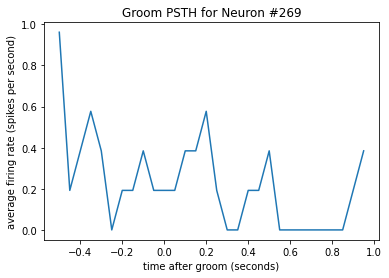

In [146]:
ID = 269
plt.figure()
plt.plot(bin_times, psth_groom[ID])
#plt.plot(bin_times, psth_groom_a[ID])
#plt.plot(bin_times, psth_groom_h[ID])
#plt.plot(bin_times, psth_groom_s[ID])
#plt.plot(bin_times, psth_groom_b[ID])
plt.title('Groom PSTH for Neuron #'+str(ID))
plt.ylabel('average firing rate (spikes per second)')
plt.xlabel('time after groom (seconds)')
#plt.legend(['all', 'a', 'h', 's', 'b'])
plt.show()

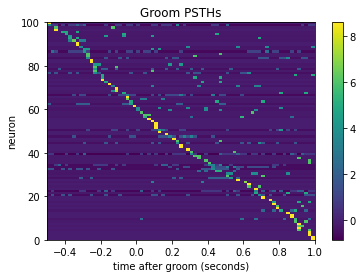

In [123]:
# z-score, filter by cutoff, sort by max z-score, plot

psth_groom_zscored = psth_groom.apply(scipy.stats.zscore)
psth_groom_filtered = psth_groom_zscored.loc[:, psth_groom_zscored.max() > z_score_cutoff]
psth_groom_sorted = psth_groom_filtered.loc[:,psth_groom_filtered.idxmax().sort_values().index]


extent = [-time_window_width/3, time_window_width*2/3, 0, len(psth_groom_sorted.columns)]

plt.imshow(psth_groom_sorted.T, interpolation='none', extent=extent, aspect='auto')
plt.ylabel('neuron') 
plt.xlabel('time after groom (seconds)') 
plt.title('Groom PSTHs') 
plt.colorbar()
plt.show()

In [147]:
psth_groom_zscored = psth_groom.apply(scipy.stats.zscore)
psth_groom_s = psth_groom_zscored.reindex(sorted(psth_groom_zscored.columns), axis=1)

In [160]:
psth_groom_s

7         8         9         12        13        14        15   \
0  -0.267261 -0.267261 -0.862662 -0.470871 -0.367607 -0.267261 -0.333333   
1  -0.267261 -0.267261 -0.862662 -0.470871 -0.367607 -0.267261 -0.333333   
2  -0.267261 -0.267261 -0.862662 -0.470871 -0.367607 -0.267261 -0.333333   
3  -0.267261 -0.267261 -0.862662 -0.470871 -0.367607 -0.267261 -0.333333   
4  -0.267261 -0.267261  0.754829 -0.470871 -0.367607 -0.267261 -0.333333   
5  -0.267261 -0.267261 -0.862662 -0.470871 -0.367607 -0.267261 -0.333333   
6  -0.267261 -0.267261  0.754829 -0.470871 -0.367607 -0.267261 -0.333333   
7  -0.267261 -0.267261  0.754829 -0.470871 -0.367607 -0.267261 -0.333333   
8  -0.267261 -0.267261 -0.862662 -0.470871 -0.367607 -0.267261  3.000000   
9  -0.267261 -0.267261 -0.862662 -0.470871 -0.367607 -0.267261 -0.333333   
10 -0.267261 -0.267261 -0.862662  1.547147 -0.367607 -0.267261 -0.333333   
11 -0.267261 -0.267261  0.754829 -0.470871 -0.367607 -0.267261 -0.333333   
12 -0.267261 -0.267261  0.754829 -0.470871 -0.367607 -0.267261 -0.333333   
13 -0.267261 -0.267261 -0.862662 -0.470871 -0.367607 -0.267261 -0.333333   
14 -0.267261  3.741657  2.372321 -0.470871 -0.367607 -0.267261 -0.333333   
15 -0.267261 -0.267261  0.754829 -0.470871 -0.367607 -0.267261 -0.333333   
16 -0.267261 -0.267261 -0.862662 -0.470871 -0.367607 -0.267261 -0.333333   
17 -0.267261 -0.267261 -0.862662 -0.470871 -0.367607 -0.267261 -0.333333   
18 -0.267261 -0.267261 -0.862662 -0.470871 -0.367607 -0.267261 -0.333333   
19 -0.267261  3.741657  0.754829 -0.470871 -0.367607 -0.267261 -0.333333   
20 -0.267261 -0.267261 -0.862662 -0.470871  4.043680  3.741657 -0.333333   
21 -0.267261 -0.267261  0.754829  1.547147 -0.367607 -0.267261 -0.333333   
22 -0.267261 -0.267261  0.754829 -0.470871  1.838037 -0.267261 -0.333333   
23 -0.267261 -0.267261  2.372321  1.547147  1.838037 -0.267261 -0.333333   
24 -0.267261 -0.267261  0.754829 -0.470871 -0.367607  3.741657 -0.333333   
25 -0.267261 -0.267261  0.754829 -0.470871 -0.367607 -0.267261 -0.333333   
26 -0.267261 -0.267261 -0.862662  1.547147 -0.367607 -0.267261  3.000000   
27  3.741657 -0.267261  0.754829  3.565166  1.838037 -0.267261 -0.333333   
28 -0.267261 -0.267261 -0.862662 -0.470871 -0.367607 -0.267261 -0.333333   
29  3.741657 -0.267261 -0.862662  1.547147 -0.367607 -0.267261  3.000000   

         18        19        20   ...       326       330       332       335  \
0  -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695 -0.333333 -0.185695   
1  -0.185695 -0.185695 -0.185695  ... -0.333333  5.385165 -0.333333 -0.185695   
2  -0.185695 -0.185695 -0.185695  ...  3.000000 -0.185695  3.000000 -0.185695   
3  -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695  3.000000 -0.185695   
4  -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695 -0.333333 -0.185695   
5  -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695 -0.333333 -0.185695   
6  -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695 -0.333333 -0.185695   
7  -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695 -0.333333 -0.185695   
8  -0.185695 -0.185695 -0.185695  ...  3.000000 -0.185695 -0.333333 -0.185695   
9  -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695 -0.333333 -0.185695   
10 -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695 -0.333333 -0.185695   
11 -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695 -0.333333 -0.185695   
12 -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695 -0.333333 -0.185695   
13 -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695 -0.333333 -0.185695   
14 -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695 -0.333333 -0.185695   
15 -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695 -0.333333 -0.185695   
16 -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695 -0.333333 -0.185695   
17 -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695 -0.333333 -0.185695   
18 -0.185695 -0.185695 -0.185695  ... -0.333333 -0.185695 -0.333333 -0.185695   
19 -0.185695 -0.185695 -0.185695

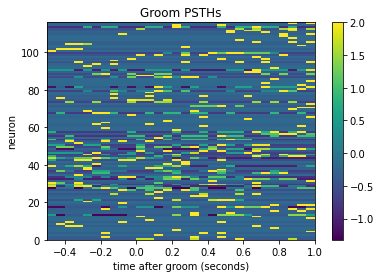

In [159]:
extent = [-time_window_width/3, time_window_width*2/3, 0, len(psth_groom_s.columns)]

plt.imshow(psth_groom_s.T, interpolation='none', extent=extent, aspect='auto', vmax = 2)
plt.ylabel('neuron') 
plt.xlabel('time after groom (seconds)') 
plt.title('Groom PSTHs') 
plt.colorbar()
plt.show()

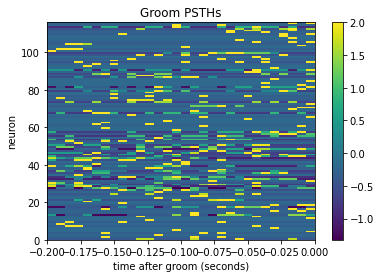

In [162]:
extent = [-0.2, 0.0, 0, len(psth_groom_s.columns)]

plt.imshow(psth_groom_s.T, interpolation='none', extent=extent, aspect='auto', vmax = 2)
plt.ylabel('neuron') 
plt.xlabel('time after groom (seconds)') 
plt.title('Groom PSTHs') 
plt.colorbar()
plt.show()

In [161]:
maxstd = psth_groom_s.max()
print(maxstd)
print(maxstd.max())

7      3.741657
8      3.741657
9      2.372321
12     3.565166
13     4.043680
         ...   
342    5.385165
343    3.000000
348    5.385165
350    3.000000
352    3.780756
Length: 116, dtype: float64
5.385164807134505


In [121]:
list(psth_groom_sorted.columns)
len(psth_groom_zscored.columns)

116

In [44]:
# prints out individual rear type start times
# get list of dataframes, each of which has spike times, neuron id, rear type for one instance of behavior
# 'yes' = wall rear, 'no' = free-standing rear, column title in csv 'sup', i.e., 'supported'

psth_list_2 = []
count = 0
for n, name in enumerate(name_list):
    if 'rear' in name:
        
        print(count)
        neural_LED_sincestart = video_Starttime[count] - cam4_start_seg1 + \
                                frames2LED_sincestart[count]/framerate - delay
        count += 1
        types = ['yes', 'no']
        
        print(neural_LED_sincestart)
        for ty in types:
            find_t = behavior_list[n]['sup'] == ty
            for i in range(len(np.where(find_t == True)[0])):
                print('rear type ', ty, ' : ', behavior_list[n]['start_time'][np.where(find_t == True)[0][i]])
#                 neural_LED_sincestart = video_Starttime + frames2LED_sincestart/framerate - delay
                first_beh_since_neural_recording = neural_LED_sincestart + behavior_list[n]['start_time'][np.where(find_t == True)[0][i]]
                min_bound = np.where(spike_times/sample_rate >= first_beh_since_neural_recording + time_window[0])[0]
                max_bound = np.where(spike_times/sample_rate <= first_beh_since_neural_recording + time_window[1])[0]
        #         print(first_beh_since_neural_recording)
                d = {'spike_times': np.concatenate(
                    spike_times[min_bound[0]:max_bound[-1]])/30000 - spike_times[min_bound[0]]/30000
                     , 'neuron_id': np.concatenate(clusters[min_bound[0]:max_bound[-1]]), 'wall': ty}
#                 print(d)
                df = pd.DataFrame(data=d)
                psth_list_2.append(df)
#             allgroom_psthlist.append(psth_list)
#         allseg_psthlist.append(allgroom_psthlist)
        
print(psth_list_2)

0
0.15549999999999997
rear type  no  :  357.3666667
rear type  no  :  383.5666667
rear type  no  :  480.0666667
1
8296.688833333334
rear type  yes  :  627.0833333
rear type  yes  :  824.5166667
rear type  yes  :  840.0666667
rear type  yes  :  849.7833333
rear type  yes  :  873.7333333
rear type  yes  :  920.8
rear type  yes  :  932.65
rear type  yes  :  937.2333333
rear type  yes  :  947.2
rear type  yes  :  954.25
rear type  yes  :  962.1
rear type  yes  :  971.55
rear type  yes  :  978.6
rear type  yes  :  984.9666667
rear type  no  :  600.3333333
rear type  no  :  611.75
rear type  no  :  710.35
rear type  no  :  846.2666667
rear type  no  :  868.7333333
rear type  no  :  966.0166667
rear type  no  :  974.4333333
rear type  no  :  1741.666667
rear type  no  :  1750.133333
rear type  no  :  1776.683333
rear type  no  :  1783.033333
2
15512.388833333334
rear type  yes  :  1321.7
rear type  yes  :  1325.85
rear type  yes  :  1331.8
rear type  yes  :  1338.0
rear type  yes  :  1951.2
3

In [45]:
# make PSTHs for both groom types separately and together
# 24 'yes', 21 'no'

psth_rear = pd.DataFrame()
psth_rear_y = pd.DataFrame()
psth_rear_n = pd.DataFrame()

for df in psth_list_2:
    for neuron_id in df['neuron_id'].unique():
        if neuron_id in good_clusters:
            neuron_spike_times = df[df['neuron_id']==neuron_id]['spike_times']
            #print(neuron_spike_times)
            psth_rear[neuron_id] = [0]*bin_count
            counts,_ = np.histogram(neuron_spike_times, bins = np.arange(0, 1.501, bin_width))
            psth_rear[neuron_id] += counts/(len(psth_list_2))/bin_width
    df_y = df[df['wall'] == 'yes']
    for neuron_id in df_y['neuron_id'].unique():
        if neuron_id in good_clusters:
            neuron_spike_times = df_y[df_y['neuron_id']==neuron_id]['spike_times']
            #print(neuron_spike_times)
            psth_rear_y[neuron_id] = [0]*bin_count
            counts,_ = np.histogram(neuron_spike_times, bins = np.arange(0, 1.501, bin_width))
            psth_rear_y[neuron_id] += counts/(len(psth_list_2))/bin_width
    df_n = df[df['wall'] == 'no']
    for neuron_id in df_n['neuron_id'].unique():
        if neuron_id in good_clusters:
            neuron_spike_times = df_n[df_n['neuron_id']==neuron_id]['spike_times']
            #print(neuron_spike_times)
            psth_rear_n[neuron_id] = [0]*bin_count
            counts,_ = np.histogram(neuron_spike_times, bins = np.arange(0, 1.501, bin_width))
            psth_rear_n[neuron_id] += counts/(len(psth_list_2))/bin_width

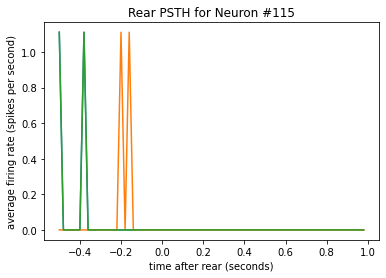

In [72]:
ID = 115
plt.figure()
plt.plot(bin_times, psth_rear[ID])
plt.plot(bin_times, psth_rear_y[ID])
plt.plot(bin_times, psth_rear_n[ID])
plt.title('Rear PSTH for Neuron #'+str(ID))
plt.ylabel('average firing rate (spikes per second)')
plt.xlabel('time after rear (seconds)')
#plt.legend([psth_rear, psth_rear_y, psth_rear_n], ['all', 'yes', 'no'])
plt.show()

In [47]:
psth_rear_zscored = psth_rear.apply(scipy.stats.zscore)
z_score_cutoff = 3
psth_rear_filtered = psth_rear_zscored.loc[:, psth_rear_zscored.max() > z_score_cutoff]
psth_rear_sorted = psth_rear_filtered.loc[:,psth_rear_filtered.idxmax().sort_values().index]
psth_rear_sorted

9         115       119       15        247       117       46   \
0   4.898979  6.041523  8.602325  8.602325 -0.237356 -0.116248 -0.294884   
1  -0.204124 -0.165521 -0.116248 -0.116248  4.213075  8.602325  3.391165   
2   4.898979 -0.165521 -0.116248 -0.116248 -0.237356 -0.116248 -0.294884   
3  -0.204124 -0.165521 -0.116248 -0.116248 -0.237356 -0.116248 -0.294884   
4  -0.204124 -0.165521 -0.116248 -0.116248 -0.237356 -0.116248 -0.294884   
..       ...       ...       ...       ...       ...       ...       ...   
70 -0.204124 -0.165521 -0.116248 -0.116248 -0.237356 -0.116248 -0.294884   
71 -0.204124 -0.165521 -0.116248 -0.116248 -0.237356 -0.116248 -0.294884   
72 -0.204124 -0.165521 -0.116248 -0.116248  4.213075 -0.116248 -0.294884   
73  4.898979 -0.165521 -0.116248 -0.116248 -0.237356 -0.116248  3.391165   
74 -0.204124 -0.165521 -0.116248 -0.116248 -0.237356 -0.116248 -0.294884   

         157       26        58   ...       23        251       89        76   \
0  -0.116248 -0.237356 -0.116248  ... -0.116248 -0.116248 -0.252646 -0.165521   
1  -0.116248 -0.237356 -0.116248  ... -0.116248 -0.116248 -0.252646 -0.165521   
2   8.602325 -0.237356 -0.116248  ... -0.116248 -0.116248 -0.252646 -0.165521   
3  -0.116248  4.213075  8.602325  ... -0.116248 -0.116248 -0.252646 -0.165521   
4  -0.116248 -0.237356 -0.116248  ... -0.116248 -0.116248 -0.252646 -0.165521   
..       ...       ...       ...  ...       ...       ...       ...       ...   
70 -0.116248 -0.237356 -0.116248  ... -0.116248 -0.116248 -0.252646 -0.165521   
71 -0.116248 -0.237356 -0.116248  ... -0.116248 -0.116248  2.905424 -0.165521   
72 -0.116248 -0.237356 -0.116248  ... -0.116248 -0.116248 -0.252646  6.041523   
73 -0.116248 -0.237356 -0.116248  ... -0.116248 -0.116248 -0.252646 -0.165521   
74 -0.116248 -0.237356 -0.116248  ... -0.116248 -0.116248 -0.252646 -0.165521   

         313       20        299       70        93        244  
0  -0.116248 -0.165521 -0.165521 -0.116248 -0.329956 -0.116248  
1  -0.116248 -0.165521 -0.165521 -0.116248 -0.329956 -0.116248  
2  -0.116248 -0.165521 -0.165521 -0.116248 -0.329956 -0.116248  
3  -0.116248 -0.165521 -0.165521 -0.116248 -0.329956 -0.116248  
4  -0.116248 -0.165521 -0.165521 -0.116248 -0.329956 -0.116248  
..       ...       ...       ...       ...       ...       ...  
70 -0.116248 -0.165521  6.041523  8.602325  2.419677 -0.116248  
71 -0.116248 -0.165521 -0.165521 -0.116248  5.169311 -0.116248  
72 -0.116248  6.041523  6.041523 -0.116248  2.419677 -0.116248  
73 -0.116248 -0.165521 -0.165521 -0.116248 -0.329956  8.602325  
74 -0.116248 -0.165521 -0.165521 -0.116248  2.419677 -0.116248  

[75 rows x 98 columns]

In [27]:
# locomotion, 37 bouts
psth_list_3 = []
count = 0
for n, name in enumerate(name_list):
    if 'locomotion' in name:
        
        print(count)
        neural_LED_sincestart = video_Starttime[count] - cam4_start_seg1 + \
                                frames2LED_sincestart[count]/framerate - delay
        count += 1
        
        print(neural_LED_sincestart)

        for locomotion in behavior_list[n]['start_time']:
            print('locomotion : ', locomotion) 
            first_beh_since_neural_recording = neural_LED_sincestart + locomotion
            min_bound = np.where(spike_times/sample_rate >= first_beh_since_neural_recording + time_window[0])[0]
            max_bound = np.where(spike_times/sample_rate <= first_beh_since_neural_recording + time_window[1])[0]
        #         print(first_beh_since_neural_recording)
            d = {'spike_times': np.concatenate(
            spike_times[min_bound[0]:max_bound[-1]])/30000 - spike_times[min_bound[0]]/30000
                 , 'neuron_id': np.concatenate(clusters[min_bound[0]:max_bound[-1]])}
#                 print(d)
            df = pd.DataFrame(data=d)
            psth_list_3.append(df)
        
print(psth_list_3)

0
0.15549999999999997
locomotion :  375.25
locomotion :  404.5333333
locomotion :  457.3833333
locomotion :  477.8833333
1
8296.688833333334
locomotion :  34.55
locomotion :  51.58333333
locomotion :  145.8
locomotion :  528.3666667
locomotion :  555.3166667
locomotion :  610.2333333
locomotion :  614.2
locomotion :  623.9333333
locomotion :  814.9
locomotion :  818.4666667
locomotion :  891.1333333
locomotion :  936.0666667
locomotion :  952.8
locomotion :  958.1333333
locomotion :  987.4166667
locomotion :  991.9
locomotion :  1155.2
locomotion :  1183.533333
locomotion :  1355.133333
2
15512.388833333334
locomotion :  239.3166667
locomotion :  1118.616667
locomotion :  1127.433333
locomotion :  1314.466667
3
19840.805500000002
locomotion :  459.9
locomotion :  542.45
locomotion :  546.1166667
locomotion :  550.9833333
locomotion :  671.2
locomotion :  1002.066667
locomotion :  1495.0
locomotion :  1507.283333
locomotion :  1961.55
locomotion :  2415.216667
[      spike_times  neuron

In [151]:
# make PSTHs for locomotion

psth_loco = pd.DataFrame()

for df in psth_list_3:
    for neuron_id in df['neuron_id'].unique():
        if neuron_id in good_clusters:
            neuron_spike_times = df[df['neuron_id']==neuron_id]['spike_times']
            #print(neuron_spike_times)
            psth_loco[neuron_id] = [0]*bin_count
            counts,_ = np.histogram(neuron_spike_times, bins = np.arange(0, 1.501, bin_width))
            psth_loco[neuron_id] += counts/(len(psth_list_3))/bin_width

c:\users\yttri-lab\anaconda3\envs\neurobehavior\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


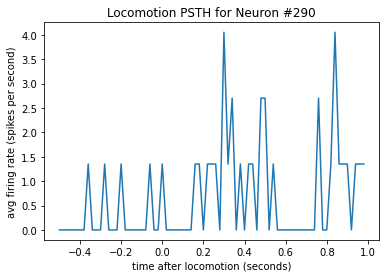

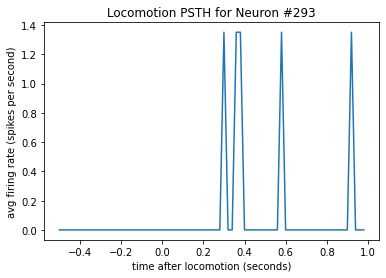

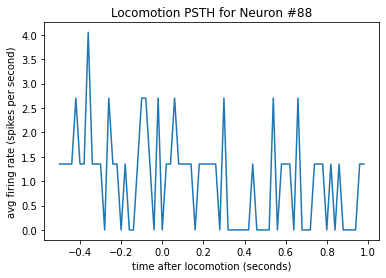

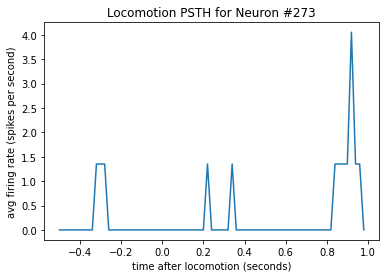

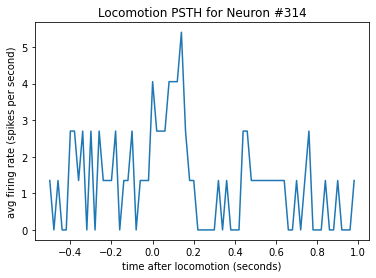

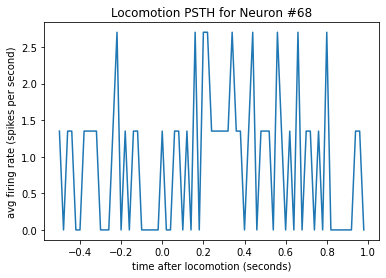

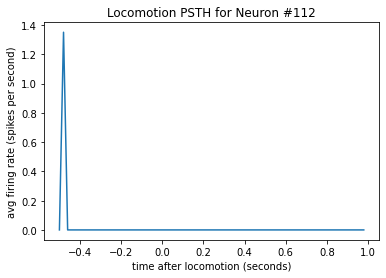

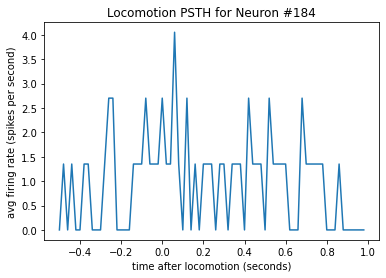

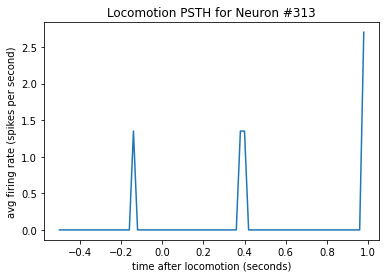

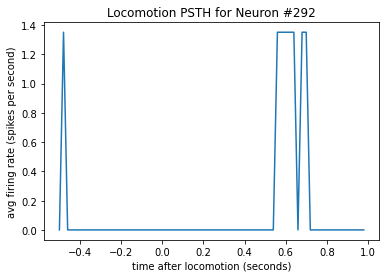

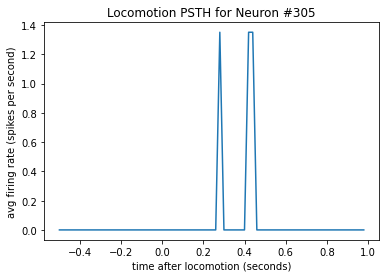

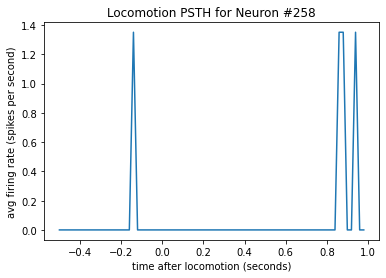

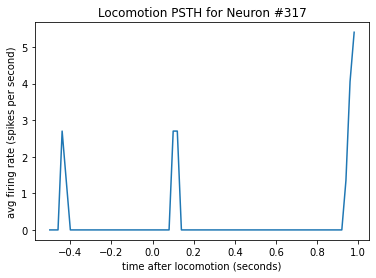

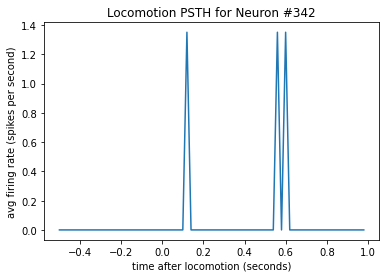

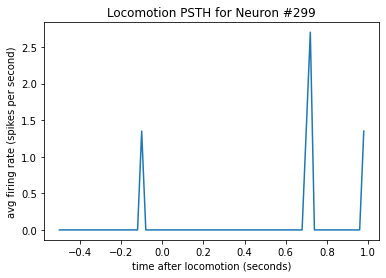

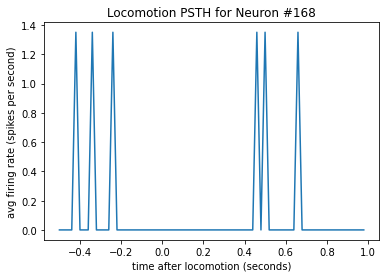

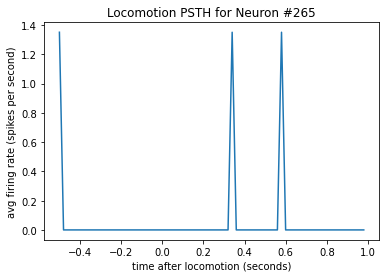

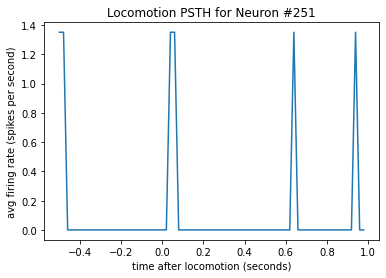

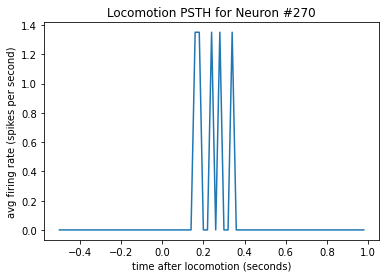

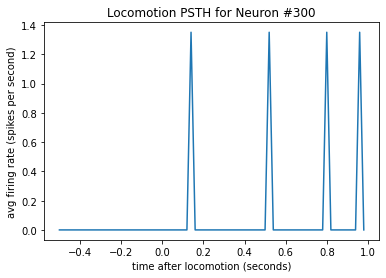

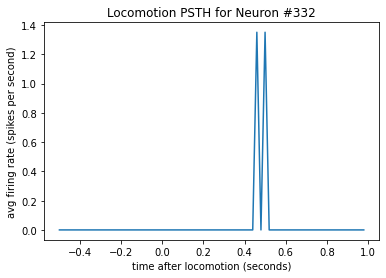

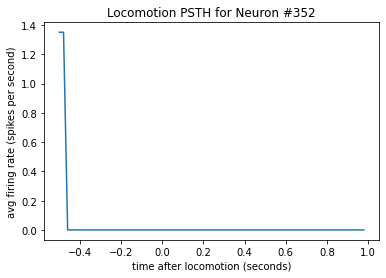

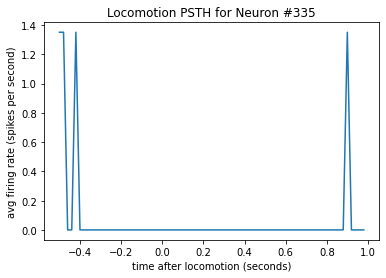

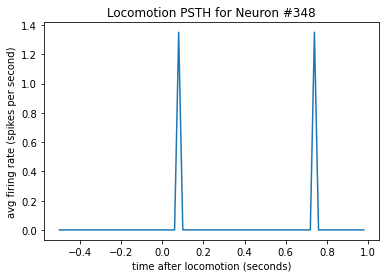

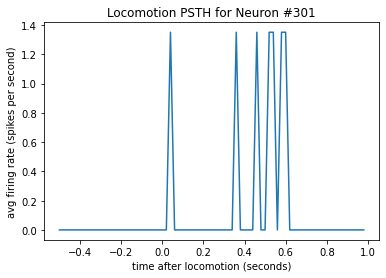

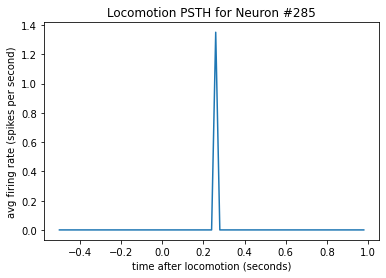

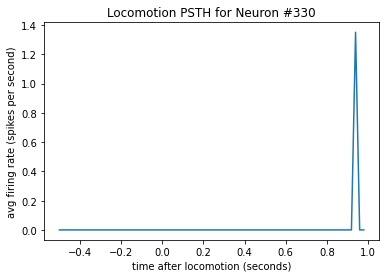

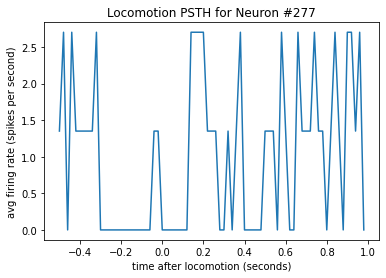

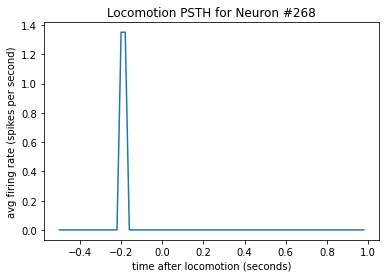

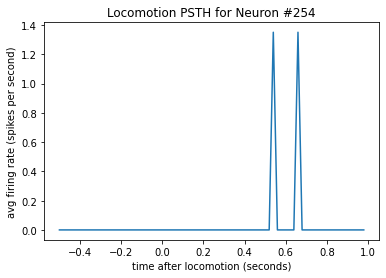

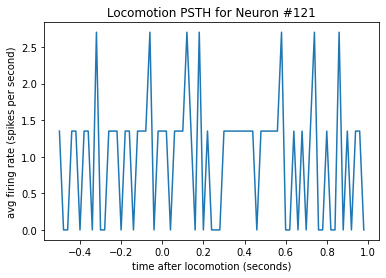

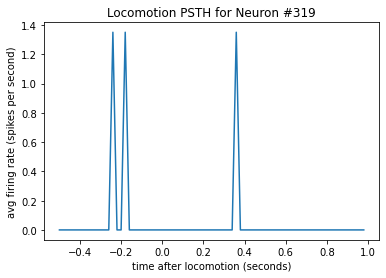

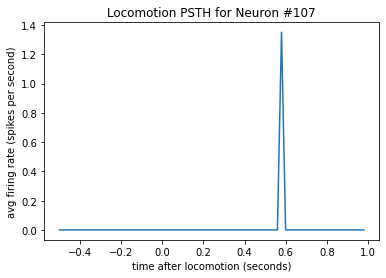

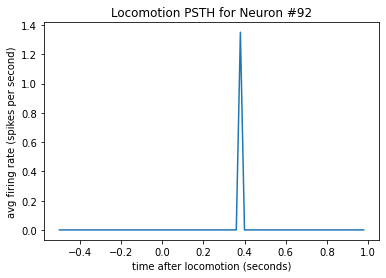

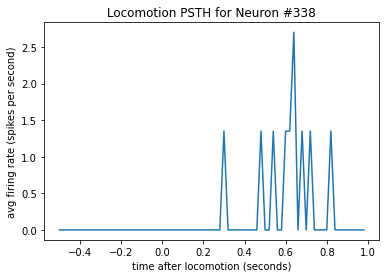

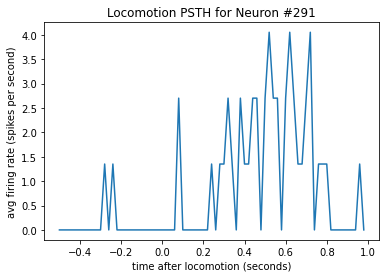

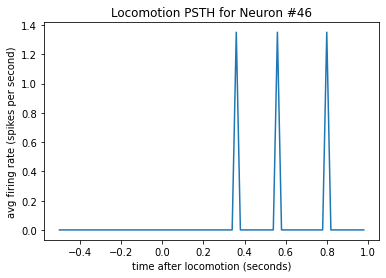

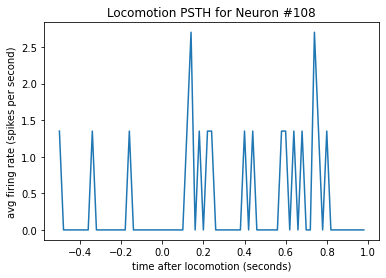

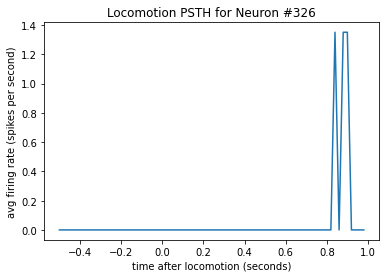

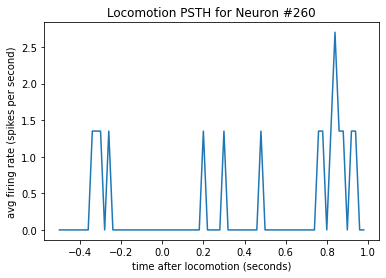

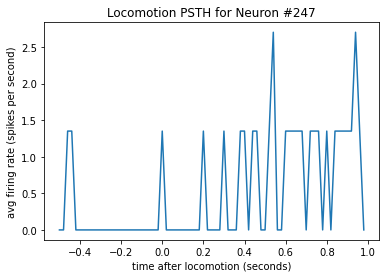

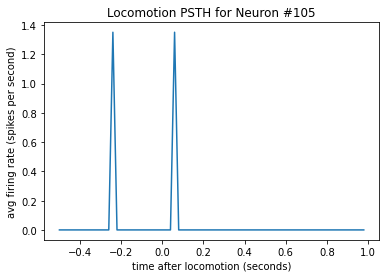

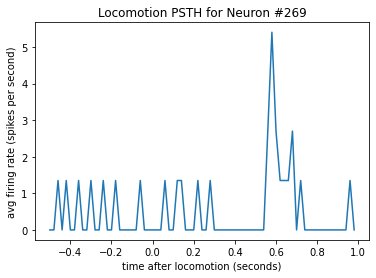

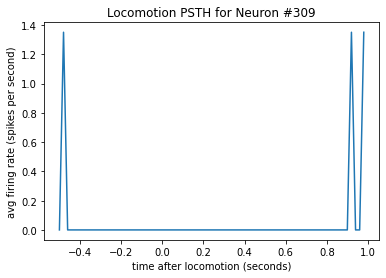

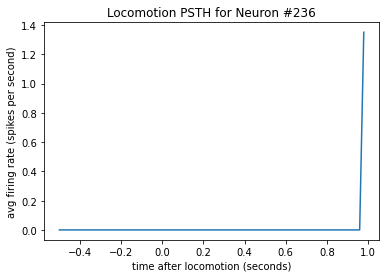

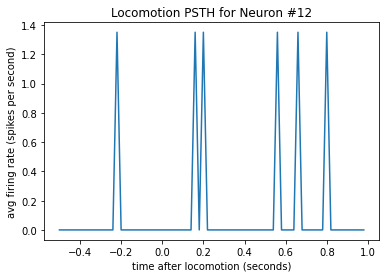

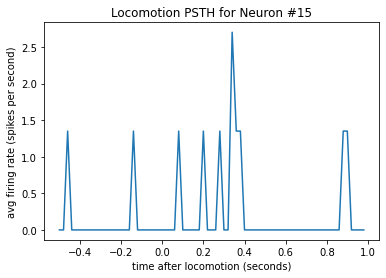

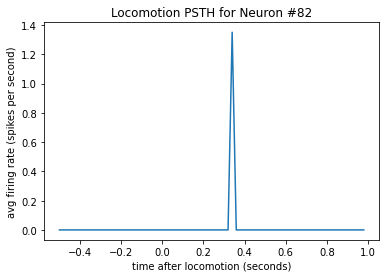

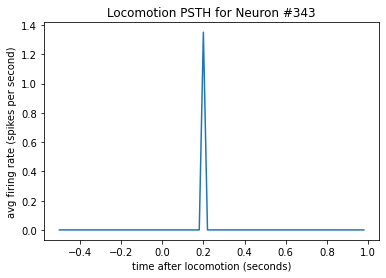

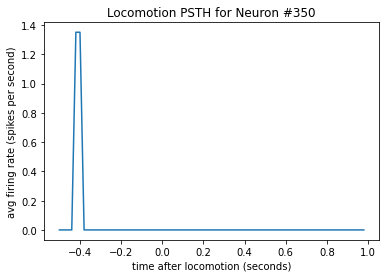

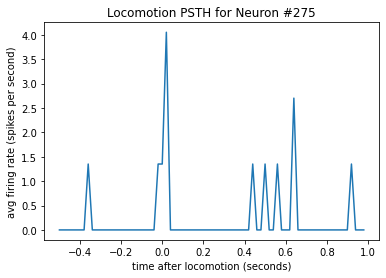

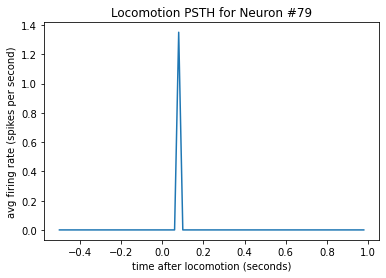

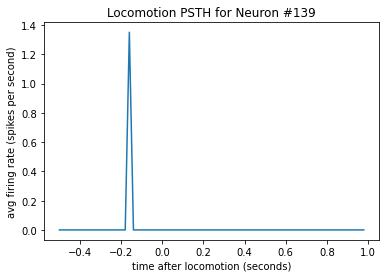

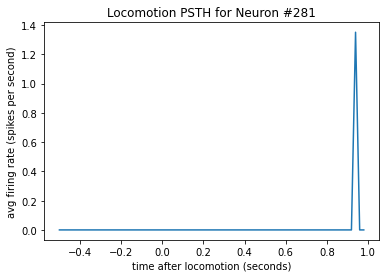

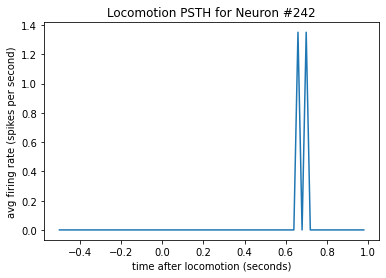

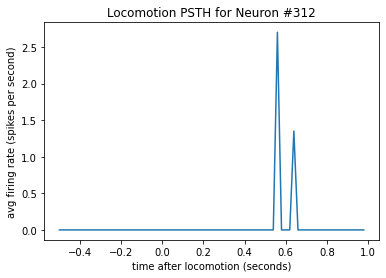

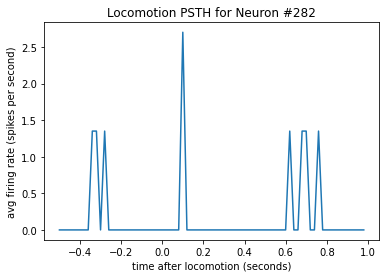

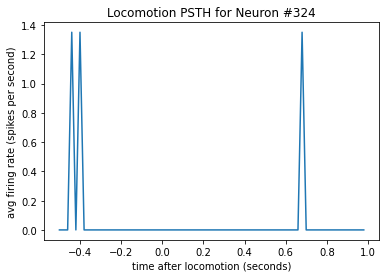

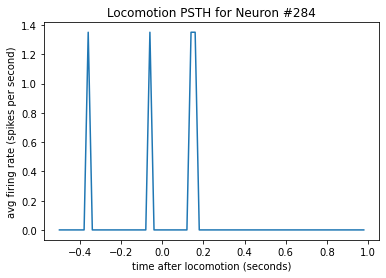

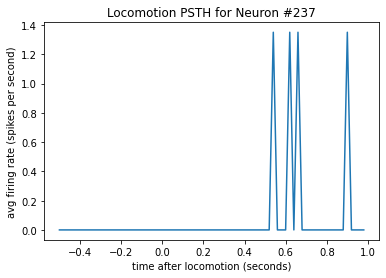

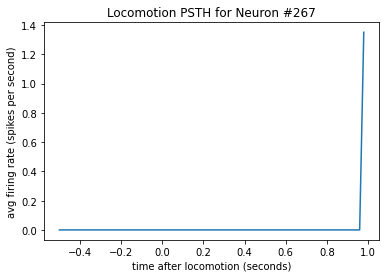

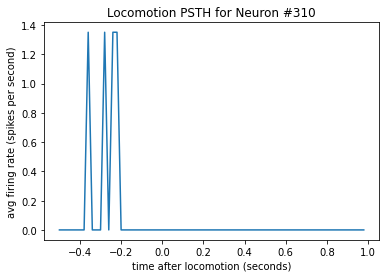

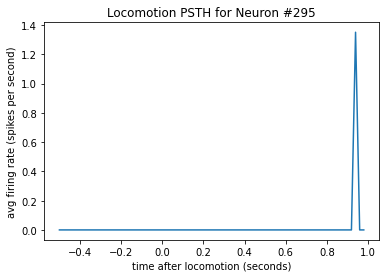

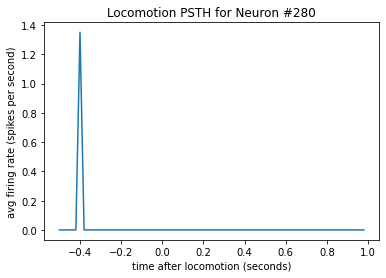

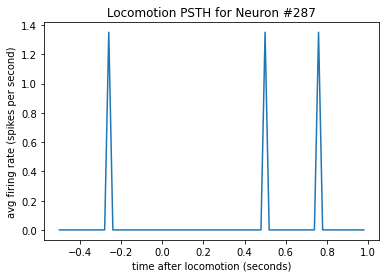

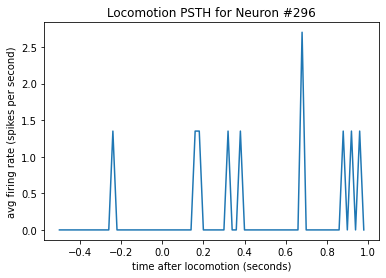

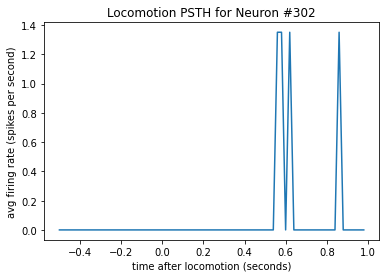

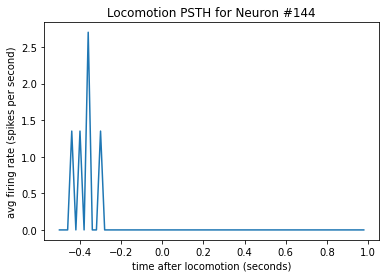

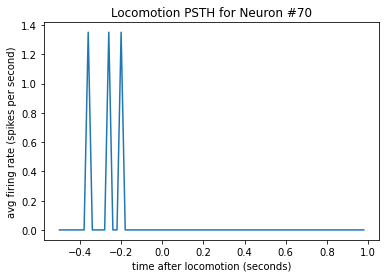

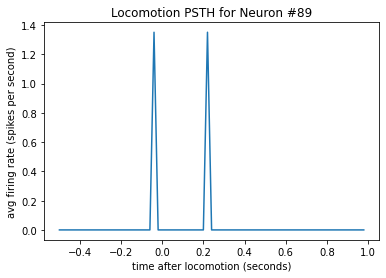

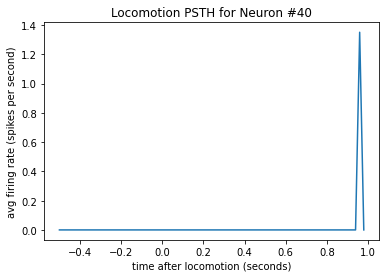

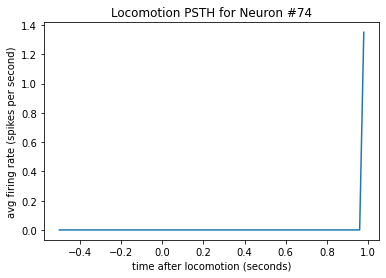

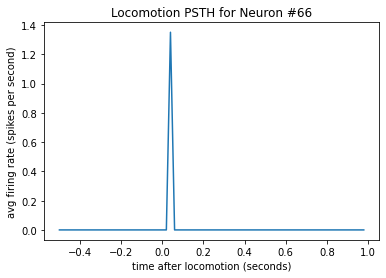

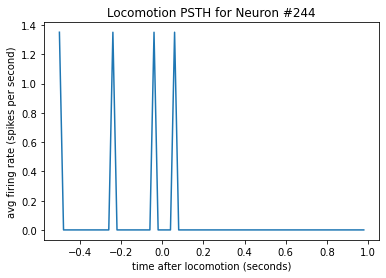

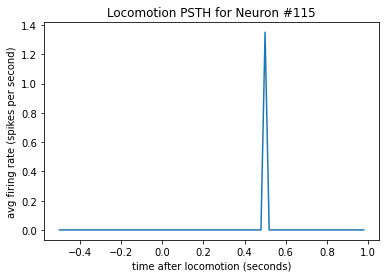

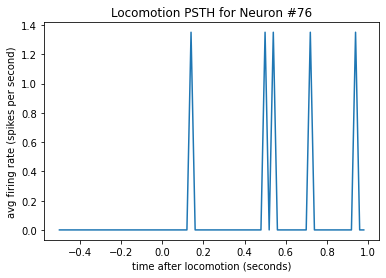

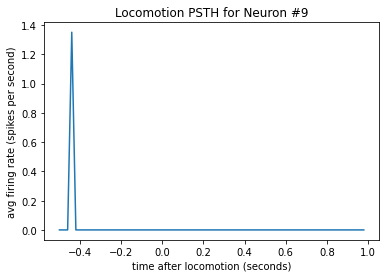

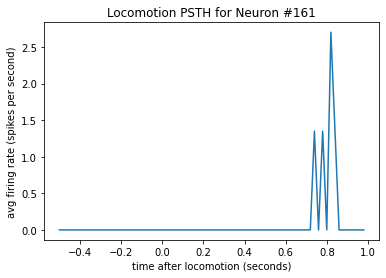

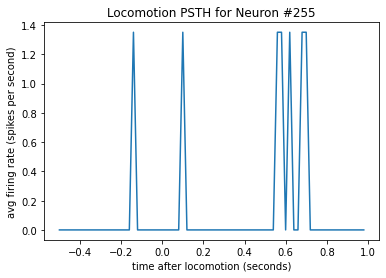

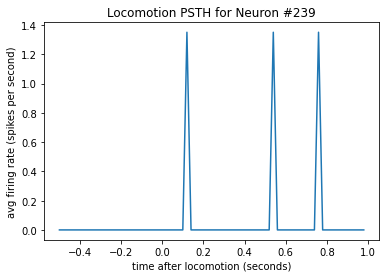

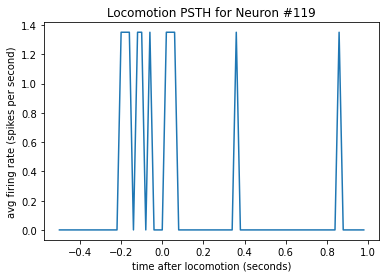

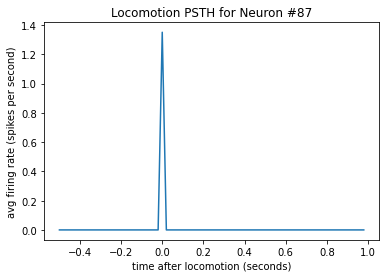

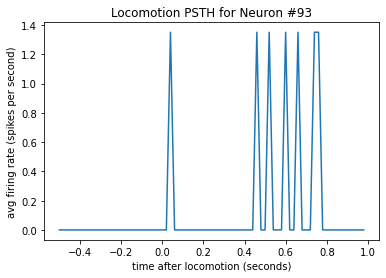

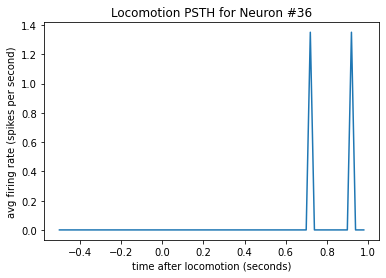

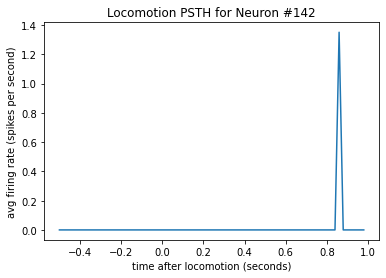

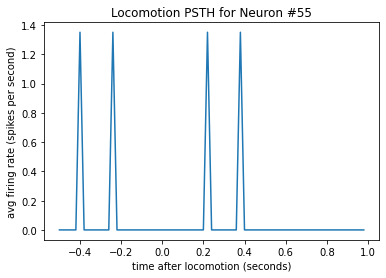

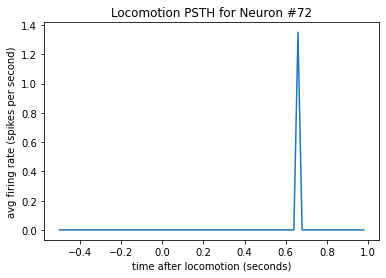

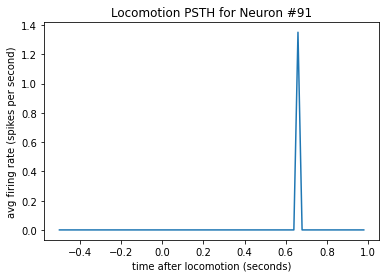

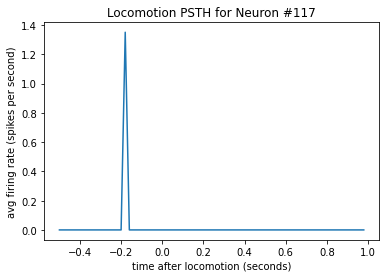

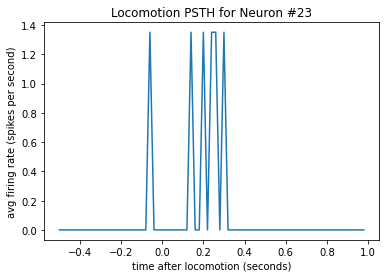

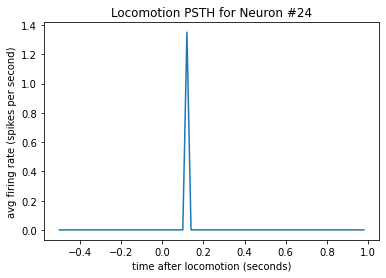

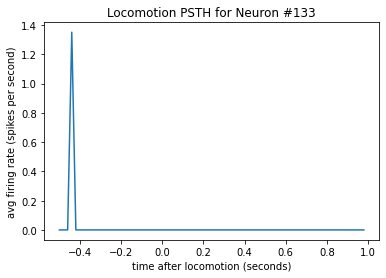

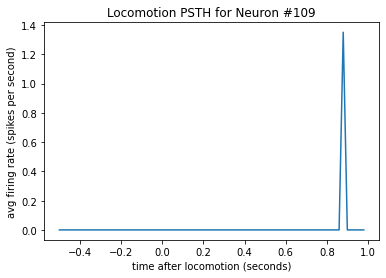

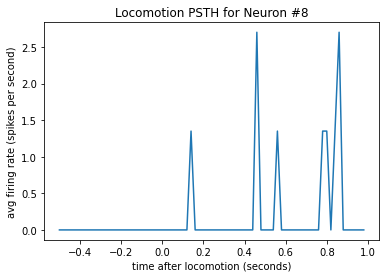

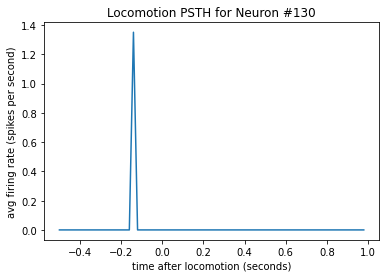

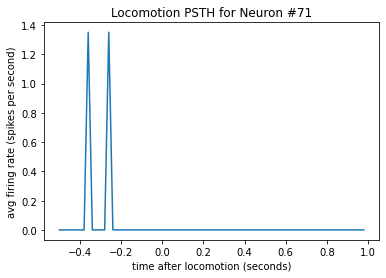

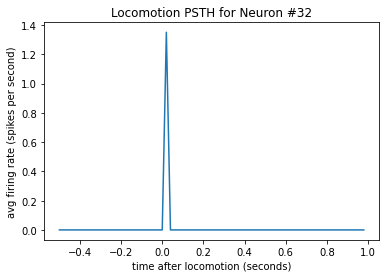

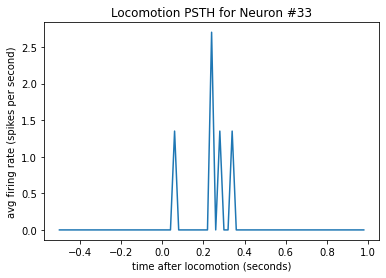

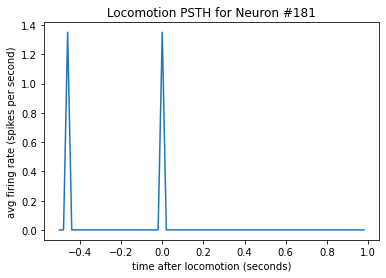

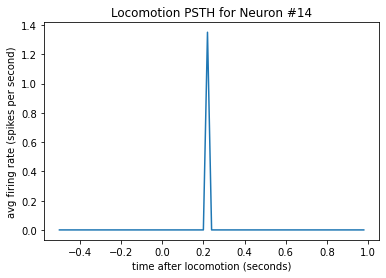

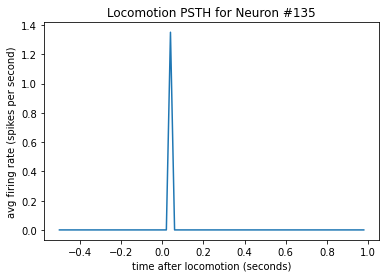

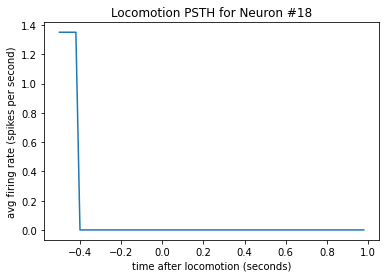

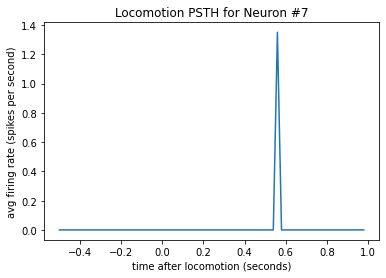

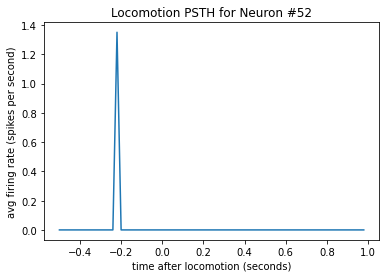

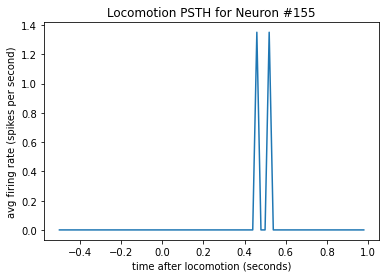

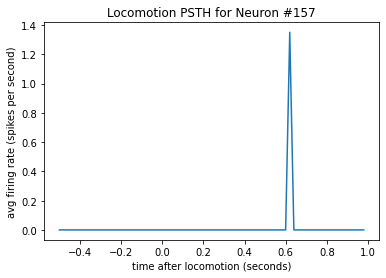

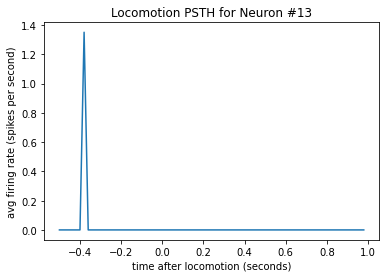

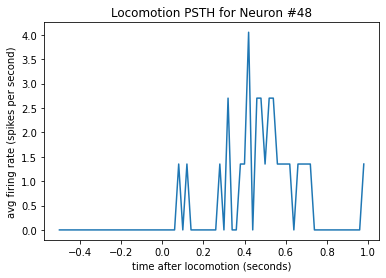

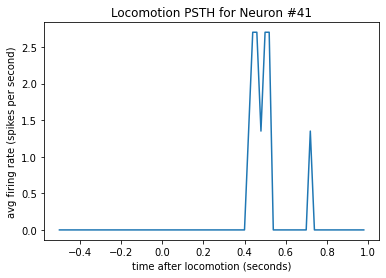

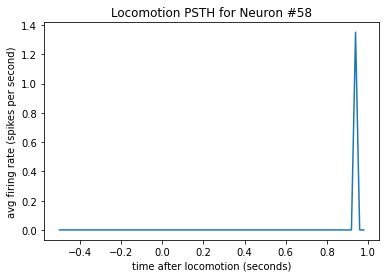

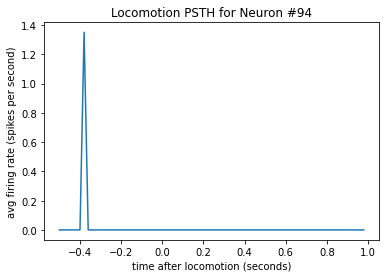

In [83]:
for neuron_id in psth_loco:
    ID = neuron_id
    plt.figure()
    plt.plot(bin_times, psth_loco[ID])
    plt.title('Locomotion PSTH for Neuron #'+str(ID))
    plt.ylabel('avg firing rate (spikes per second)')
    plt.xlabel('time after locomotion (seconds)')
plt.show()

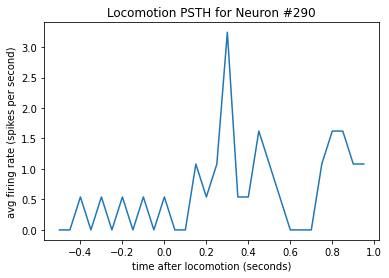

In [152]:
ID = 290
plt.figure()
plt.plot(bin_times, psth_loco[ID])
plt.title('Locomotion PSTH for Neuron #'+str(ID))
plt.ylabel('avg firing rate (spikes per second)')
plt.xlabel('time after locomotion (seconds)')
plt.show()

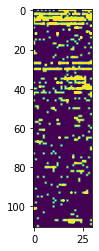

In [156]:
plt.imshow(psth_loco.T, vmax = .5)

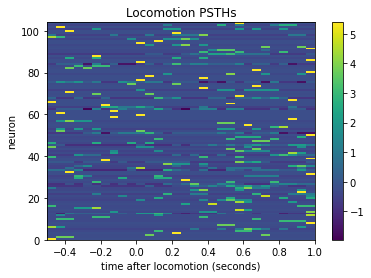

In [164]:
psth_loco_zscored = psth_loco.apply(scipy.stats.zscore)

#psth_loco_filtered = psth_loco_zscored.loc[:, psth_loco_zscored.max() > z_score_cutoff]
#psth_loco_sorted = psth_loco_filtered.loc[:,psth_loco_filtered.idxmax().sort_values().index]

psth_loco_s = psth_loco_zscored.reindex(sorted(psth_loco_zscored.columns), axis=1)

extent = [-time_window_width/3, time_window_width*2/3, 0, len(psth_loco_sorted.columns)]

plt.imshow(psth_loco_s.T, interpolation='none', extent=extent, aspect='auto')
plt.ylabel('neuron') 
plt.xlabel('time after locomotion (seconds)') 
plt.title('Locomotion PSTHs') 
plt.colorbar()
plt.show()

In [80]:
# itch, 32 bouts
psth_list_4 = []
count = 0
for n, name in enumerate(name_list):
    if 'itch' in name:
        
        print(count)
        neural_LED_sincestart = video_Starttime[count] - cam4_start_seg1 + \
                                frames2LED_sincestart[count]/framerate - delay
        count += 1
        
        print(neural_LED_sincestart)

        for itch in behavior_list[n]['start_time']:
            print('itch : ', itch) 
            first_beh_since_neural_recording = neural_LED_sincestart + itch
            min_bound = np.where(spike_times/sample_rate >= first_beh_since_neural_recording + time_window[0])[0]
            max_bound = np.where(spike_times/sample_rate <= first_beh_since_neural_recording + time_window[1])[0]
        #         print(first_beh_since_neural_recording)
            d = {'spike_times': np.concatenate(
            spike_times[min_bound[0]:max_bound[-1]])/30000 - spike_times[min_bound[0]]/30000
                 , 'neuron_id': np.concatenate(clusters[min_bound[0]:max_bound[-1]])}
#                 print(d)
            df = pd.DataFrame(data=d)
            psth_list_4.append(df)
        
print(psth_list_4)

0
0.15549999999999997
itch :  542.9
itch :  551.3833333
itch :  566.7
itch :  581.8
itch :  616.8166667
itch :  631.0
itch :  811.05
itch :  834.5
itch :  841.2666667
itch :  872.8166667
itch :  1207.683333
itch :  1257.95
itch :  1329.75
itch :  1344.566667
itch :  1354.35
itch :  1392.8
itch :  1411.416667
itch :  1424.9
itch :  1487.566667
itch :  1539.433333
1
8296.688833333334
itch :  198.3166667
itch :  207.2833333
itch :  214.3
itch :  264.65
itch :  285.4833333
itch :  471.4666667
itch :  705.6
itch :  1102.7
2
15512.388833333334
itch :  529.6666667
3
19840.805500000002
itch :  2032.266667
itch :  2374.766667
itch :  2727.083333
[      spike_times  neuron_id
0        0.000000        334
1        0.000700        278
2        0.000967        314
3        0.001433        258
4        0.002333        153
...           ...        ...
1497     1.492800          5
1498     1.493267        314
1499     1.493933         61
1500     1.494367        289
1501     1.496333        171

[1502

In [81]:
# make PSTHs for itch

psth_itch = pd.DataFrame()

for df in psth_list_4:
    for neuron_id in df['neuron_id'].unique():
        if neuron_id in good_clusters:
            neuron_spike_times = df[df['neuron_id']==neuron_id]['spike_times']
            #print(neuron_spike_times)
            psth_itch[neuron_id] = [0]*bin_count
            counts,_ = np.histogram(neuron_spike_times, bins = np.arange(0, 1.501, bin_width))
            psth_itch[neuron_id] += counts/(len(psth_list_3))/bin_width

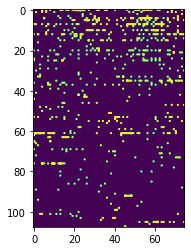

In [82]:
plt.imshow(psth_itch.T, vmin = 0.2, vmax = 1)